From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



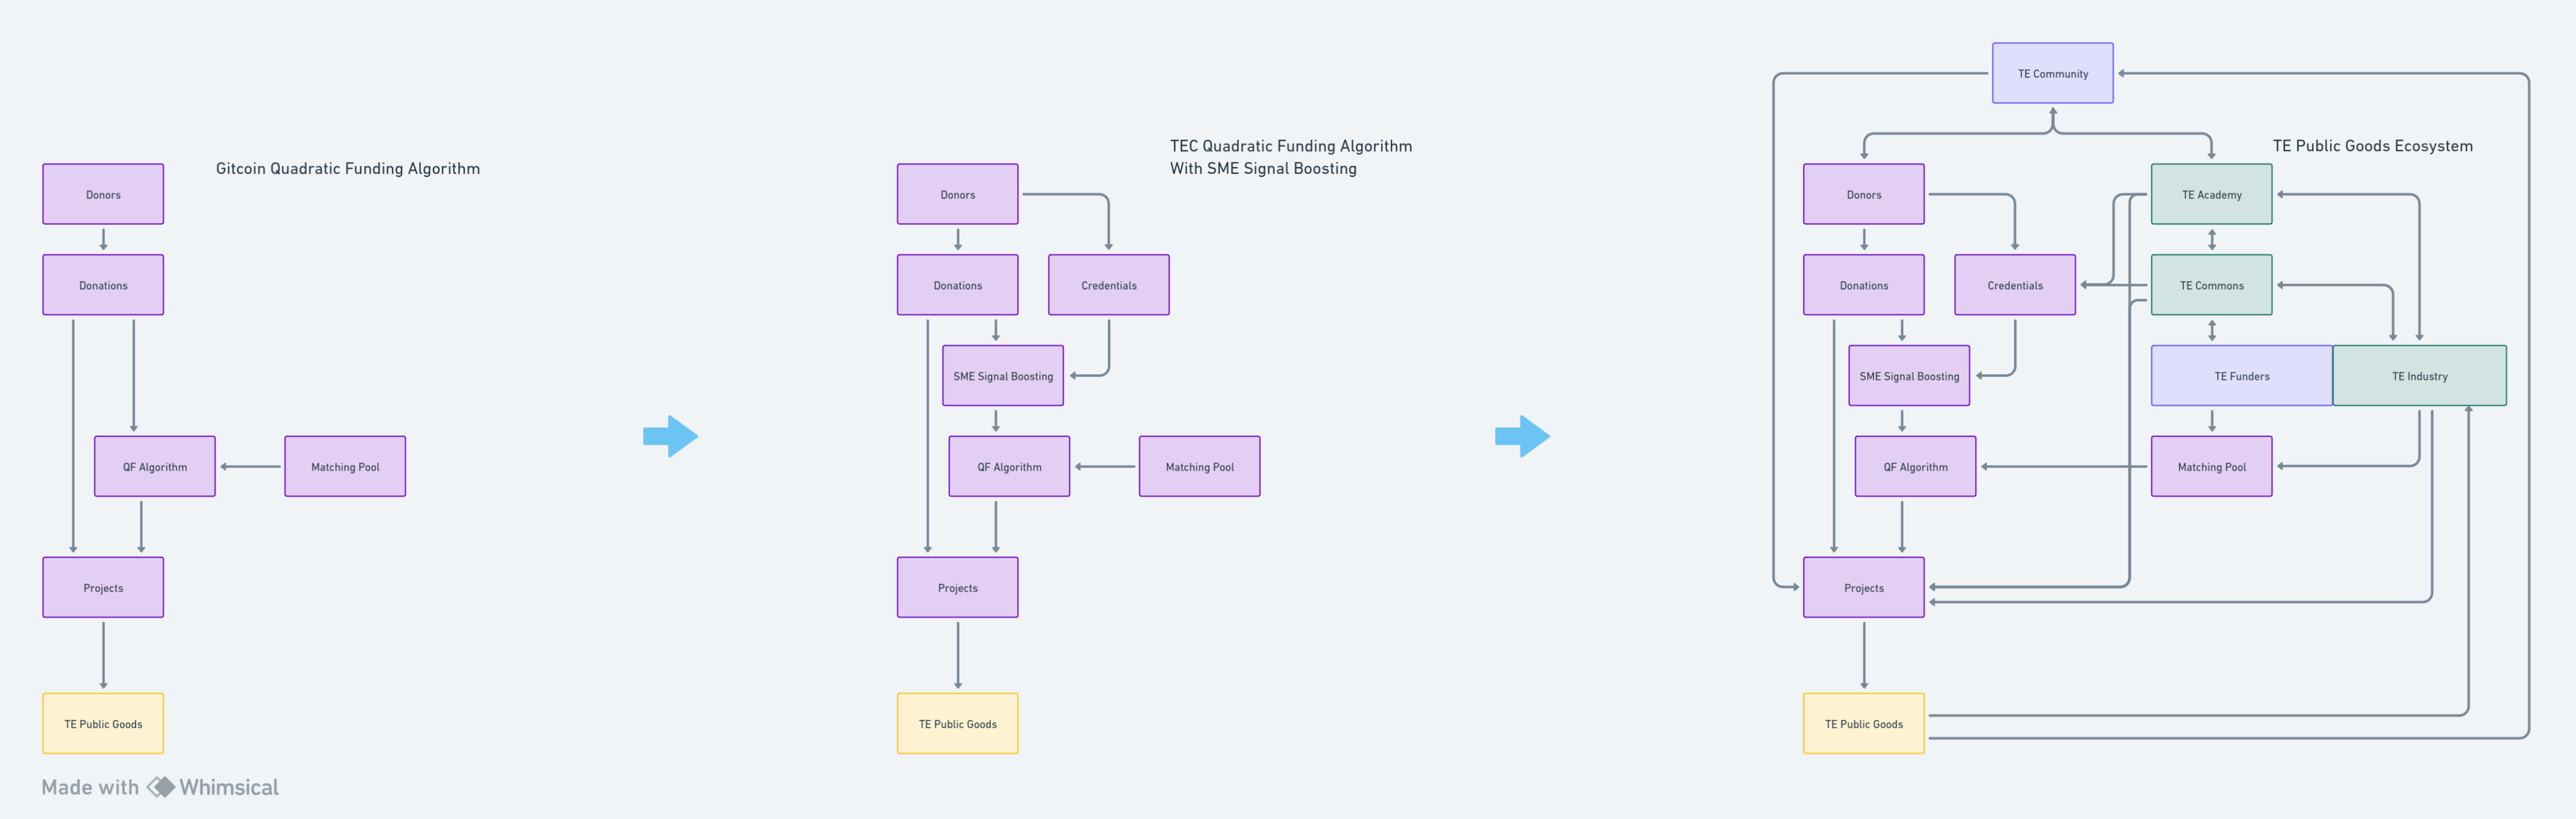![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [ ]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [ ]:
society

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
community

array([20, 24,  0, 28,  2, 27, 19, 25,  4, 26,  7,  9, 13, 17, 29,  3, 16,
       18, 15, 14, 21,  6, 11,  5, 23])

In [ ]:
public_goods

[(0, 4),
 (1, 18),
 (2, 5),
 (3, 0),
 (4, 18),
 (5, 14),
 (6, 9),
 (7, 29),
 (8, 16),
 (9, 17),
 (10, 0),
 (11, 29),
 (12, 9),
 (13, 28),
 (14, 11),
 (15, 29),
 (16, 24),
 (17, 2),
 (18, 26),
 (19, 5),
 (20, 17),
 (21, 17),
 (22, 20),
 (23, 16)]

In [ ]:
len(society)

30

In [ ]:
len(community)

25

In [ ]:
len(public_goods)

24

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [ ]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [ ]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [ ]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [ ]:
concave_function_parameters_generator()

{'f0': 0.2664102397970574,
 'f1': 0.1471709005595792,
 'steepness': 18.852037667568936}

In [ ]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [ ]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=719, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [ ]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 720)

Make Funding the Index from 0 to 100

In [ ]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [ ]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [ ]:
df_value_functions

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000       0.21746     0.208030     0.000000     0.000000     0.045274   
0.002506       0.21746     0.217288     0.003223     0.007747     0.045274   
0.005013       0.21746     0.226388     0.006431     0.015373     0.045274   
0.007519       0.21746     0.235333     0.009624     0.022879     0.045274   
0.010025       0.21746     0.244125     0.012802     0.030267     0.045274   
...                ...          ...          ...          ...          ...   
0.989975       0.21746     0.750033     0.584235     0.492038     0.045274   
0.992481       0.21746     0.750044     0.584749     0.492053     0.045274   
0.994987       0.21746     0.750054     0.585261     0.492068     0.045274   
0.997494       0.21746     0.750064     0.585770     0.492082     0.045274   
1.000000       0.21746     0.750073     0.586277     0.492096     0.045274   

value_p_i  ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                      
0.000000      0.000000     0.491850     0.000000      0.05669     0.000000   
0.002506      0.001009     0.494330     0.011514      0.05669     0.017511   
0.005013      0.001972     0.496745     0.022781      0.05669     0.034707   
0.007519      0.002890     0.499099     0.033805      0.05669     0.051594   
0.010025      0.003767     0.501392     0.044593      0.05669     0.068178   
...                ...          ...          ...          ...          ...   
0.989975      0.022040     0.588421     0.535727      0.05669     0.973150   
0.992481      0.022040     0.588421     0.535729      0.05669     0.973164   
0.994987      0.022040     0.588421     0.535731      0.05669     0.973177   
0.997494      0.022040     0.588421     0.535733      0.05669     0.973190   
1.000000      0.022040     0.588421     0.535735      0.05669     0.973203   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        0.607749        0.000000        0.165386   
0.002506   ...        0.611017        0.016611        0.166304   
0.005013   ...        0.614203        0.032674        0.167219   
0.007519   ...        0.617310        0.048209        0.168129   
0.010025   ...        0.620338        0.063232        0.169035   
...        ...             ...             ...             ...   
0.989975   ...        0.737839        0.504350        0.333235   
0.992481   ...        0.737840        0.504350        0.333384   
0.994987   ...        0.737840        0.504350        0.333534   
0.997494   ...        0.737840        0.504350        0.333682   
1.000000   ...        0.737840        0.504351        0.333830   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         0.248925        0.000000             0.0        0.000000   
0.002506         0.260287        0.010423             0.0        0.013020   
0.005013         0.271291        0.020617             0.0        0.025679   
0.007519         0.281948        0.030585             0.0        0.037985   
0.010025         0.292269        0.040334             0.0        0.049949   
...                   ...             ...             ...             ...   
0.989975         0.609406        0.472636             0.0        0.468362   
0.992481         0.609406        0.472638             0.0        0.468363   
0.994987         0.609407        0.472639             0.0        0.468363   
0.997494         0.609407        0.472641             0.0        0.468363   
1.000000         0.609407        0.472642             0.0        0.468363   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                                          

Display Citizen Preferences for Funding.

In [ ]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [ ]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [ ]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [ ]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [ ]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=24)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [ ]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 24,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [ ]:
dist_gen.generate_distribution()

0     0.001584
1     0.110750
2     0.008833
3     0.031446
4     0.000600
5     0.021671
6     0.038178
7     0.014035
8     0.036480
9     0.026159
10    0.113802
11    0.013261
12    0.091810
13    0.001328
14    0.014510
15    0.058270
16    0.040421
17    0.001592
18    0.034898
19    0.025337
20    0.113802
21    0.101085
22    0.032839
23    0.067309
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [ ]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [ ]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [ ]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.013818
1     0.018802
2     0.063822
3     0.029692
4     0.021488
5     0.011894
6     0.032563
7     0.018149
8     0.006730
9     0.002575
10    0.108793
11    0.042116
12    0.070738
13    0.179350
14    0.018038
15    0.031550
16    0.000594
17    0.071612
18    0.015082
19    0.096273
20    0.016468
21    0.000871
22    0.006636
23    0.122343
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [ ]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 24
ic|k: 18


In [ ]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by citizen I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=24)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [ ]:
len(public_goods)

24

In [ ]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [ ]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good        0         1         2         3    4         5         6   \
Citizen                                                                        
0            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2            0.219513  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
5            0.000000  1.000000  0.000000  0.000000  0.0  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  1.000000   
7            0.427963  0.000000  0.000000  0.000000  0.0  0.000000  0.234424   
8            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
9            0.148991  0.026526  0.000000  0.081452  0.0  0.000000  0.149038   
10           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.293583   
11           0.000000  0.000000  0.165447  0.000000  0.0  0.000000  0.000000   
12           0.000000  0.000000  1.000000  0.000000  0.0  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.164883  0.0  0.000000  0.000000   
14           0.000000  0.000000  0.000000  1.000000  0.0  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
17           0.215768  0.103645  0.045977  0.000000  0.0  0.000000  0.000000   
18           0.000000  0.000000  0.326809  0.000000  0.0  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
20           0.415112  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.214118   
25           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
26           0.000000  0.665351  0.000000  0.000000  0.0  0.264909  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

Public Good        7         8         9   ...        14        15        16  \
Citizen                                    ...                                 
0            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  ...  0.245621  0.000000  0.000000   
2            0.000000  0.182692  0.000000  ...  0.116725  0.329042  0.145811   
3            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
4            1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
8            0.264017  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
9            0.593993  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  ...  0.000000  0.085330  0.000000   
14           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

In [ ]:
contributions.sum()

Public Good
0     1.427347
1     1.795521
2     1.538233
3     1.246335
4     0.000000
5     0.264909
6     1.891162
7     2.858010
8     0.182692
9     0.150016
10    0.996517
11    2.295578
12    1.709839
13    0.579656
14    2.362346
15    2.796782
16    0.438898
17    0.906741
18    1.686507
19    1.349393
20    1.607851
21    0.831361
22    1.078087
23    0.006217
dtype: float64

In [ ]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [ ]:
contributions.sum().sum()

30.0

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [ ]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [ ]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [ ]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
dtype: float64

In [ ]:
public_goods_funding.sum(axis=1)

Citizen
0     0.423308
1     0.842479
2     2.653073
3     0.423308
4     0.349894
5     0.556941
6     0.528775
7     0.762582
8     0.631264
9     0.471152
10    1.024094
11    0.777175
12    0.650097
13    0.855150
14    0.802352
15    0.621948
16    0.584850
17    1.541525
18    0.836888
19    0.435620
20    0.935872
21    0.349894
22    0.357554
23    0.435620
24    1.384462
25    0.741074
26    1.411727
27    0.489322
28    0.529058
29    0.592942
dtype: float64

In [ ]:
public_goods_funding.sum().sum()

23.0

In [ ]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [ ]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [ ]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [ ]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [ ]:
normalized_contributions.sum(axis=0)

Public Good
0     0.013818
1     0.018802
2     0.063822
3     0.029692
4     0.000000
5     0.011894
6     0.032563
7     0.018149
8     0.006730
9     0.002575
10    0.108793
11    0.042116
12    0.070738
13    0.179350
14    0.018038
15    0.031550
16    0.000594
17    0.071612
18    0.015082
19    0.096273
20    0.016468
21    0.000871
22    0.006636
23    0.122343
dtype: float64

#### The Normalized Citizen Cost Distribution

In [ ]:
normalized_contributions.sum(axis=1)

Citizen
0     0.007636
1     0.005339
2     0.135999
3     0.007636
4     0.006350
5     0.010472
6     0.017219
7     0.045038
8     0.006932
9     0.009999
10    0.128761
11    0.071129
12    0.041490
13    0.037085
14    0.023824
15    0.010242
16    0.041371
17    0.026781
18    0.017703
19    0.018347
20    0.050212
21    0.006350
22    0.011281
23    0.018347
24    0.043853
25    0.071345
26    0.021123
27    0.029562
28    0.048145
29    0.008943
dtype: float64

In [ ]:
normalized_contributions.sum().sum()

0.9785122686342757

### The Total Utility of Citizens

#### Value Functions Dataset Revisited

Melting preferences to get groupby on public good or on citizen.

In [ ]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

value_p_i    value public_good citizen
funding                                              
0.000000     ((0, 4), 0)  0.21746      (0, 4)       0
0.002506     ((0, 4), 0)  0.21746      (0, 4)       0
0.005013     ((0, 4), 0)  0.21746      (0, 4)       0
0.007519     ((0, 4), 0)  0.21746      (0, 4)       0
0.010025     ((0, 4), 0)  0.21746      (0, 4)       0
...                  ...      ...         ...     ...
0.989975  ((23, 16), 29)  0.53269    (23, 16)      29
0.992481  ((23, 16), 29)  0.53269    (23, 16)      29
0.994987  ((23, 16), 29)  0.53269    (23, 16)      29
0.997494  ((23, 16), 29)  0.53269    (23, 16)      29
1.000000  ((23, 16), 29)  0.53269    (23, 16)      29

[288000 rows x 4 columns]

Groupby funding and public good to get mean funding preferences per public good.

Display mean value function per public good.

In [ ]:
df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index().hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [ ]:
df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index().hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Value per Citizen as Public Goods are Funded')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total value per public good given funding.

In [ ]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good     (0, 4)    (1, 18)    (10, 0)   (11, 29)    (12, 9)   (13, 28)  \
funding                                                                         
0.000000      3.440553   6.675608   4.621273   4.623329   4.234854   6.393094   
0.002506      3.686721   6.959956   4.974003   5.066006   4.563662   6.690538   
0.005013      3.926016   7.235120   5.316039   5.495568   4.881963   6.978057   
0.007519      4.158657   7.501428   5.647732   5.912430   5.190128   7.256025   
0.010025      4.384857   7.759199   5.969422   6.316996   5.488516   7.524802   
...                ...        ...        ...        ...        ...        ...   
0.989975     14.267957  17.212970  18.230235  21.151559  16.498198  17.342737   
0.992481     14.268960  17.213777  18.231702  21.151947  16.498940  17.343115   
0.994987     14.269957  17.214579  18.233162  21.152332  16.499675  17.343489   
0.997494     14.270946  17.215377  18.234616  21.152712  16.500406  17.343858   
1.000000     14.271928  17.216171  18.236063  21.153089  16.501130  17.344222   

public_good   (14, 11)   (15, 29)   (16, 24)    (17, 2)  ...   (21, 17)  \
funding                                                  ...              
0.000000      6.371211   6.835821   6.421467   6.189987  ...   6.475789   
0.002506      6.709452   7.092148   6.655650   6.411515  ...   6.662246   
0.005013      7.034911   7.339794   6.882530   6.625474  ...   6.842696   
0.007519      7.348103   7.579096   7.102360   6.832153  ...   7.017355   
0.010025      7.649523   7.810378   7.315383   7.031829  ...   7.186430   
...                ...        ...        ...        ...  ...        ...   
0.989975     16.624111  17.215904  15.369629  14.868960  ...  13.456516   
0.992481     16.624810  17.217448  15.370351  14.870680  ...  13.457008   
0.994987     16.625506  17.218980  15.371070  14.872390  ...  13.457495   
0.997494     16.626199  17.220502  15.371784  14.874090  ...  13.457979   
1.000000     16.626888  17.222011  15.372493  14.875782  ...  13.458459   

public_good   (22, 20)   (23, 16)     (3, 0)    (4, 18)    (5, 14)     (6, 9)  \
funding                                                                         
0.000000      6.736086   5.092674   5.329225   4.313349   4.919438   4.456546   
0.002506      6.981569   5.302265   5.550260   4.574767   5.284133   4.698989   
0.005013      7.218551   5.505606   5.763797   4.829257   5.635421   4.934024   
0.007519      7.447359   5.702899   5.970129   5.077030   5.973827   5.161915   
0.010025      7.668308   5.894340   6.169539   5.318292   6.299854   5.382920   
...                ...        ...        ...        ...        ...        ...   
0.989975     15.898138  12.985194  15.257902  17.046567  16.278900  14.800236   
0.992481     15.899186  12.985472  15.261363  17.048681  16.279427  14.801223   
0.994987     15.900227  12.985748  15.264808  17.050782  16.279950  14.802202   
0.997494     15.901262  12.986022  15.268238  17.052870  16.280469  14.803175   
1.000000     15.902289  12.986294  15.271651  17.054946  16.280983  14.804140   

public_good    (7, 29)    (8, 16)    (9, 17)  
funding                                       
0.000000      4.823530   5.973485   4.819349  
0.002506      5.124204   6.179665   5.163937  
0.005013      5.415215   6.379830   5.496906  
0.007519      5.696926   6.574180   5.818691  
0.010025      5.969684   6.762910   6.129709  
...                ...        ...        ...  
0.989975     17.352133  15.402154  17.841159  
0.992481     17.353860  15.404244  17.842821  
0.994987     17.355577  15.406323  17.844473  
0.997494     17.357283  15.408394  17.846115  
1.000000     17.358979  15.410454  17.847747  

[400 rows x 24 columns]

Total value per citizen per funding of public goods.

In [ ]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen           0          1         10         11         12         13  \
funding                                                                      
0.000000   4.614997   4.174740   5.132431   5.275353   3.311579   3.933158   
0.002506   4.819950   4.415897   5.395704   5.509525   3.535333   4.113877   
0.005013   5.018323   4.649859   5.650003   5.736709   3.751411   4.289264   
0.007519   5.210349   4.876868   5.895656   5.957149   3.960114   4.459507   
0.010025   5.396250   5.097161   6.132977   6.171078   4.161727   4.624788   
...             ...        ...        ...        ...        ...        ...   
0.989975  12.554953  14.516221  13.943841  15.203697  11.708099  12.236428   
0.992481  12.556367  14.517432  13.944142  15.204927  11.709017  12.237821   
0.994987  12.557775  14.518634  13.944441  15.206152  11.709930  12.239207   
0.997494  12.559177  14.519826  13.944737  15.207371  11.710838  12.240586   
1.000000  12.560574  14.521010  13.945029  15.208584  11.711740  12.241958   

citizen          14         15         16         17  ...         27  \
funding                                               ...              
0.000000   2.781553   5.352638   5.185743   2.786263  ...   6.858423   
0.002506   3.090538   5.530049   5.450380   3.012439  ...   7.018045   
0.005013   3.389782   5.701931   5.705614   3.230991  ...   7.172662   
0.007519   3.679616   5.868475   5.951802   3.442215  ...   7.322452   
0.010025   3.960362   6.029863   6.189286   3.646394  ...   7.467586   
...             ...        ...        ...        ...  ...        ...   
0.989975  14.303431  12.207616  13.711831  12.079285  ...  13.326506   
0.992481  14.304734  12.208356  13.712114  12.080998  ...  13.326967   
0.994987  14.306031  12.209092  13.712395  12.082701  ...  13.327423   
0.997494  14.307321  12.209823  13.712672  12.084394  ...  13.327876   
1.000000  14.308604  12.210549  13.712947  12.086077  ...  13.328323   

citizen          28         29          3          4          5          6  \
funding                                                                      
0.000000   4.386290   4.094025   4.101269   5.396034   3.563893   5.296551   
0.002506   4.664818   4.323632   4.299404   5.523398   3.761095   5.493473   
0.005013   4.933480   4.545946   4.491761   5.646877   3.952461   5.684566   
0.007519   5.192646   4.761222   4.678528   5.766612   4.138185   5.870027   
0.010025   5.442670   4.969702   4.859890   5.882738   4.318455   6.050047   
...             ...        ...        ...        ...        ...        ...   
0.989975  13.338385  12.623016  12.638534  11.343640  12.089578  13.410834   
0.992481  13.339039  12.623474  12.639948  11.344851  12.090817  13.411361   
0.994987  13.339688  12.623928  12.641356  11.346055  12.092049  13.411884   
0.997494  13.340333  12.624378  12.642756  11.347252  12.093272  13.412402   
1.000000  13.340974  12.624824  12.644149  11.348441  12.094488  13.412917   

citizen           7          8          9  
funding                                    
0.000000   3.838908   4.496540   4.091693  
0.002506   4.008624   4.683533   4.268737  
0.005013   4.174396   4.865113   4.440508  
0.007519   4.336324   5.041465   4.607188  
0.010025   4.494505   5.212772   4.768949  
...             ...        ...        ...  
0.989975  11.948142  13.280026  11.774052  
0.992481  11.948449  13.281628  11.775421  
0.994987  11.948752  13.283220  11.776783  
0.997494  11.949052  13.284803  11.778139  
1.000000  11.949349  13.286376  11.779487  

[400 rows x 30 columns]

#### The Value Tensor

In [ ]:
df_value_tensor = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_tensor

citizen            0                                                    \
public_good   (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)   
funding                                                                  
0.000000     0.21746  0.000000  0.050765  0.301507  0.348397  0.120859   
0.002506     0.21746  0.026458  0.076952  0.315335  0.348397  0.132968   
0.005013     0.21746  0.052127  0.102129  0.328877  0.348397  0.144911   
0.007519     0.21746  0.077031  0.126336  0.342139  0.348397  0.156691   
0.010025     0.21746  0.101193  0.149609  0.355127  0.348397  0.168308   
...              ...       ...       ...       ...       ...       ...   
0.989975     0.21746  0.887722  0.730049  0.970319  0.348397  0.999797   
0.992481     0.21746  0.887723  0.730049  0.970323  0.348397  0.999849   
0.994987     0.21746  0.887723  0.730049  0.970326  0.348397  0.999900   
0.997494     0.21746  0.887723  0.730049  0.970330  0.348397  0.999950   
1.000000     0.21746  0.887723  0.730049  0.970333  0.348397  1.000000   

citizen                                              ...         9            \
public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)   
funding                                              ...                       
0.000000     0.434852  0.498276  0.000000  0.000000  ...  0.400164  0.050303   
0.002506     0.434852  0.498276  0.001791  0.001047  ...  0.407457  0.050303   
0.005013     0.434852  0.498276  0.003575  0.002088  ...  0.414415  0.050303   
0.007519     0.434852  0.498276  0.005353  0.003124  ...  0.421052  0.050303   
0.010025     0.434852  0.498276  0.007124  0.004155  ...  0.427384  0.050303   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.434852  0.498276  0.376760  0.179398  ...  0.558613  0.050303   
0.992481     0.434852  0.498276  0.377188  0.179540  ...  0.558613  0.050303   
0.994987     0.434852  0.498276  0.377615  0.179682  ...  0.558613  0.050303   
0.997494     0.434852  0.498276  0.378039  0.179823  ...  0.558613  0.050303   
1.000000     0.434852  0.498276  0.378463  0.179963  ...  0.558613  0.050303   

citizen                                                                  \
public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)   
funding                                                                   
0.000000     0.000000  0.149594  0.265645  0.000000  0.000000  0.324486   
0.002506     0.028177  0.153492  0.274185  0.007466  0.002104  0.343004   
0.005013     0.055548  0.157377  0.282382  0.014747  0.004146  0.360962   
0.007519     0.082136  0.161249  0.290249  0.021846  0.006129  0.378376   
0.010025     0.107964  0.165107  0.297799  0.028768  0.008055  0.395262   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.984959  0.995978  0.477865  0.299911  0.072392  0.935805   
0.992481     0.984959  0.996989  0.477865  0.299911  0.072392  0.935806   
0.994987     0.984959  0.997996  0.477865  0.299912  0.072392  0.935806   
0.997494     0.984960  0.999000  0.477865  0.299912  0.072392  0.935806   
1.000000     0.984960  1.000000  0.477865  0.299912  0.072392  0.935806   

citizen                          
public_good   (8, 16)   (9, 17)  
funding                          
0.000000     0.153486  0.503108  
0.002506     0.153486  0.503108  
0.005013     0.153486  0.503108  
0.007519     0.153486  0.503108  
0.010025     0.153486  0.503108  
...               ...       ...  
0.989975     0.153486  0.503108  
0.992481     0.153486  0.503108  
0.994987     0.153486  0.503108  
0.997494     0.153486  0.503108  
1.000000     0.153486  0.503108  

[400 rows x 720 columns]

#### The Value Outcomes Tensor

Sampling by public goods funding distribution.

In [ ]:
index_obj = pd.Index(df_value_tensor.index)
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
df_value_outcomes_tensor = df_value_tensor.iloc[nearest_indices]
df_value_outcomes_tensor

citizen            0                                                    \
public_good   (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)   
funding                                                                  
0.015038     0.21746  0.147377  0.193499  0.380303  0.348397  0.191068   
0.020050     0.21746  0.190850  0.234071  0.404449  0.348397  0.213207   
0.062657     0.21746  0.471080  0.475828  0.573625  0.348397  0.378622   
0.030075     0.21746  0.270288  0.306242  0.449818  0.348397  0.255692   
0.022556     0.21746  0.211620  0.253191  0.416149  0.348397  0.224049   
0.012531     0.21746  0.124634  0.171986  0.367846  0.348397  0.179767   
0.032581     0.21746  0.288690  0.322580  0.460580  0.348397  0.265952   
0.017544     0.21746  0.169443  0.214184  0.392502  0.348397  0.202214   
0.007519     0.21746  0.077031  0.126336  0.342139  0.348397  0.156691   
0.002506     0.21746  0.026458  0.076952  0.315335  0.348397  0.132968   
0.107769     0.21746  0.646047  0.604768  0.697991  0.348397  0.516196   
0.042607     0.21746  0.356975  0.381872  0.501450  0.348397  0.305602   
0.070175     0.21746  0.507234  0.504110  0.597730  0.348397  0.403990   
0.180451     0.21746  0.787227  0.689985  0.821792  0.348397  0.677063   
0.017544     0.21746  0.169443  0.214184  0.392502  0.348397  0.202214   
0.032581     0.21746  0.288690  0.322580  0.460580  0.348397  0.265952   
0.000000     0.21746  0.000000  0.050765  0.301507  0.348397  0.120859   
0.072682     0.21746  0.518574  0.512820  0.605435  0.348397  0.412215   
0.015038     0.21746  0.147377  0.193499  0.380303  0.348397  0.191068   
0.095238     0.21746  0.606574  0.577554  0.667993  0.348397  0.481345   
0.017544     0.21746  0.169443  0.214184  0.392502  0.348397  0.202214   
0.000000     0.21746  0.000000  0.050765  0.301507  0.348397  0.120859   
0.007519     0.21746  0.077031  0.126336  0.342139  0.348397  0.156691   
0.122807     0.21746  0.686170  0.631092  0.730087  0.348397  0.554960   

citizen                                              ...         9            \
public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)   
funding                                              ...                       
0.015038     0.434852  0.498276  0.010648  0.006202  ...  0.439187  0.050303   
0.020050     0.434852  0.498276  0.014146  0.008227  ...  0.449928  0.050303   
0.062657     0.434852  0.498276  0.042878  0.024644  ...  0.509831  0.050303   
0.030075     0.434852  0.498276  0.021067  0.012218  ...  0.468599  0.050303   
0.022556     0.434852  0.498276  0.015885  0.009233  ...  0.454931  0.050303   
0.012531     0.434852  0.498276  0.008889  0.005181  ...  0.433424  0.050303   
0.032581     0.434852  0.498276  0.022781  0.013203  ...  0.472742  0.050303   
0.017544     0.434852  0.498276  0.012400  0.007217  ...  0.444684  0.050303   
0.007519     0.434852  0.498276  0.005353  0.003124  ...  0.421052  0.050303   
0.002506     0.434852  0.498276  0.001791  0.001047  ...  0.407457  0.050303   
0.107769     0.434852  0.498276  0.071432  0.040555  ...  0.537725  0.050303   
0.042607     0.434852  0.498276  0.029577  0.017094  ...  0.487494  0.050303   
0.070175     0.434852  0.498276  0.047767  0.027397  ...  0.516262  0.050303   
0.180451     0.434852  0.498276  0.113692  0.063331  ...  0.553287  0.050303   
0.017544     0.434852  0.498276  0.012400  0.007217  ...  0.444684  0.050303   
0.032581     0.434852  0.498276  0.022781  0.013203  ...  0.472742  0.050303   
0.000000     0.434852  0.498276  0.000000  0.000000  ...  0.400164  0.050303   
0.072682     0.434852  0.498276  0.049385  0.028306  ...  0.518211  0.050303   
0.015038     0.434852  0.498276  0.010648  0.006202  ...  0.439187  0.050303   
0.095238     0.434852  0.498276  0.063686  0.036280  ...  0.532176  0.050303   
0.017544     0.434852  0.498276  0.012400  0.007217  ...  0.444684  0.050303   
0.000000     0.434852  0.498276  0.000000  0.000000  ...  0.400164  0.050303   
0

#### Value Outcomes Tensor Values

In [ ]:
values = df_value_outcomes_tensor.unstack().values.reshape(len(df_value_outcomes_tensor), len(df_value_outcomes_tensor.columns.levels[0]), len(df_value_outcomes_tensor.columns.levels[1]))

In [ ]:
values.shape

(24, 30, 24)

#### Extract the Diagonal Plane of The Value Tensor

In [ ]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(24, 30)

####  The Value Outcomes Matrix V_P(F_P)

In [ ]:
value_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
value_given_funding.index.name = "public_goods"
value_given_funding.columns.name = "citizens"
value_given_funding

citizens            0         1         2         3         4         5   \
public_goods                                                               
(0, 4)        0.217460  0.147377  0.193499  0.380303  0.348397  0.191068   
(1, 18)       0.231550  0.064018  0.040298  0.370997  0.000000  0.303864   
(2, 5)        0.424120  0.392814  0.352259  0.362187  0.531963  0.000000   
(3, 0)        0.264594  0.376095  0.380241  0.645570  0.080424  0.284594   
(4, 18)       0.021687  0.746227  0.433925  0.112558  0.022735  0.578134   
(5, 14)       0.060159  0.082974  0.061647  0.500574  0.136590  0.031118   
(6, 9)        0.338461  0.000000  0.087700  0.632686  0.208192  0.136327   
(7, 29)       0.555045  0.489551  0.221076  0.256678  0.054379  0.037149   
(8, 16)       0.000000  0.383531  0.358698  0.073273  0.245903  0.147766   
(9, 17)       0.411871  0.193318  1.000000  0.007039  0.001376  0.033150   
(10, 0)       0.146007  0.280564  0.309867  0.530293  0.000000  0.877584   
(11, 29)      0.509147  0.526273  0.252995  0.041596  0.076121  0.418909   
(12, 9)       0.485511  0.301404  0.089905  0.212384  0.589667  0.549957   
(13, 28)      0.737476  0.942955  0.458132  0.387635  0.384976  0.685838   
(14, 11)      0.367701  0.134527  0.387840  0.233815  0.068310  0.253303   
(15, 29)      0.102854  0.404570  0.435865  0.347351  0.621821  0.043799   
(16, 24)      0.000000  0.664028  0.620455  0.543026  0.279731  0.779304   
(17, 2)       0.400576  0.565769  0.384097  0.355153  0.421246  0.627131   
(18, 26)      0.379729  0.500695  0.342407  0.061831  0.225447  0.146273   
(19, 5)       0.052156  0.591922  0.248844  0.262726  0.704245  0.733160   
(20, 17)      0.006163  0.565654  0.041368  0.452891  0.094937  0.216869   
(21, 17)      0.180213  0.622450  0.413333  0.252355  0.599209  0.438099   
(22, 20)      0.474772  0.053565  0.307374  0.413269  0.000000  0.307718   
(23, 16)      0.278370  0.157640  0.218836  0.057086  0.863557  0.404563   

citizens            6         7         8         9   ...        20        21  \
public_goods                                          ...                       
(0, 4)        0.434852  0.498276  0.010648  0.006202  ...  0.018825  0.376007   
(1, 18)       0.057024  0.000000  0.460916  0.431747  ...  0.094250  0.257170   
(2, 5)        0.522815  0.388939  0.371602  0.547231  ...  0.206104  0.158810   
(3, 0)        0.080945  0.000000  0.136978  0.654081  ...  0.000000  0.082359   
(4, 18)       0.156757  0.496213  0.000000  0.044590  ...  0.280493  0.370494   
(5, 14)       0.143042  0.684037  0.113893  0.363661  ...  0.346500  0.300039   
(6, 9)        0.571708  0.079901  0.112115  0.141403  ...  0.030704  0.699589   
(7, 29)       0.447562  0.249859  0.093001  0.118071  ...  0.404917  0.048112   
(8, 16)       0.115062  0.410417  0.035297  0.067910  ...  0.028419  0.280642   
(9, 17)       0.353980  0.005907  0.675449  0.308471  ...  0.014880  0.377198   
(10, 0)       0.192445  0.000000  0.408802  0.373335  ...  0.248238  0.340498   
(11, 29)      0.365737  0.295815  0.106141  0.152094  ...  0.504670  0.281030   
(12, 9)       0.343530  0.581852  0.750743  0.435454  ...  0.045230  0.222586   
(13, 28)      0.457881  0.656613  0.820072  0.396484  ...  0.845467  0.864849   
(14, 11)      0.051995  0.252869  0.053307  0.563714  ...  0.718308  0.537671   
(15, 29)      0.053684  0.446917  0.086624  0.231243  ...  0.000000  0.389899   
(16, 24)      0.306196  0.000000  0.533647  0.000000  ...  0.364567  0.000000   
(17, 2)       0.618023  0.188214  0.000000  0.748991  ...  0.379540  0.611824   
(18, 26)      0.117212  0.290455  0.431511  0.094766  ...  0.043446  0.950650   
(19, 5)       0.045274  0.562629  0.464216  0.396413  ...  0.202824  0.603633   
(20, 17)      0.335710  0.042451  0.178603  0.014312  ...  0.201601  0.262173   
(21, 17)      0.110579  0.000000  0.147767  0.322716  ...  0.021281  0.000000   
(22, 20)      0.238468  0.589960  0.155295  0.073976  ...  0.187342  0.236265  

#### Net Value Per Citizen Given Funding

In [ ]:
value_given_funding.sum()

citizens
0     6.645622
1     9.187921
2     7.640662
3     7.493275
4     6.559225
5     8.225681
6     6.694063
7     7.241870
8     6.679410
9     6.509265
10    5.909038
11    5.518297
12    6.075488
13    6.626445
14    6.118725
15    6.374354
16    6.323518
17    6.079768
18    8.006211
19    5.570917
20    5.730476
21    8.301802
22    6.976707
23    7.010702
24    5.884304
25    6.529419
26    7.085441
27    6.768853
28    5.531875
29    6.348829
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [ ]:
value_given_funding.sum(axis=1)

public_goods
(0, 4)       8.247678
(1, 18)      6.734155
(2, 5)      12.143787
(3, 0)       7.581626
(4, 18)      6.513682
(5, 14)      7.280029
(6, 9)       8.961504
(7, 29)      5.833212
(8, 16)      5.810991
(9, 17)      6.178079
(10, 0)     11.249873
(11, 29)     8.075063
(12, 9)     10.493828
(13, 28)    15.485602
(14, 11)     7.674191
(15, 29)     6.856768
(16, 24)     7.709955
(17, 2)     11.887822
(18, 26)     6.206532
(19, 5)     10.970059
(20, 17)     6.282843
(21, 17)     5.054884
(22, 20)     7.583990
(23, 16)    10.832005
dtype: float64

In [ ]:
value_given_funding_melted = value_given_funding.melt(ignore_index=False)

In [ ]:
value_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Value

In [ ]:
u = value_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_address_map)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

#### Citizen Utility Equation
A citizens utility is their net value from public goods minus their total contributions minus any taxes that they pay.

In [ ]:
citizen_value = value_given_funding.sum()
citizen_value

citizens
0     6.645622
1     9.187921
2     7.640662
3     7.493275
4     6.559225
5     8.225681
6     6.694063
7     7.241870
8     6.679410
9     6.509265
10    5.909038
11    5.518297
12    6.075488
13    6.626445
14    6.118725
15    6.374354
16    6.323518
17    6.079768
18    8.006211
19    5.570917
20    5.730476
21    8.301802
22    6.976707
23    7.010702
24    5.884304
25    6.529419
26    7.085441
27    6.768853
28    5.531875
29    6.348829
dtype: float64

In [ ]:
citizen_contributions = contributions.sum(axis=1)
citizen_contributions

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [ ]:
uniform_tax = 0.05
citizen_taxes = pd.Series([uniform_tax] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [ ]:
citizen_utility = citizen_value - citizen_contributions - citizen_taxes
citizen_utility

citizens
0     5.595622
1     8.137921
2     6.590662
3     6.443275
4     5.509225
5     7.175681
6     5.644063
7     6.191870
8     5.629410
9     5.459265
10    4.859038
11    4.468297
12    5.025488
13    5.576445
14    5.068725
15    5.324354
16    5.273518
17    5.029768
18    6.956211
19    4.520917
20    4.680476
21    7.251802
22    5.926707
23    5.960702
24    4.834304
25    5.479419
26    6.035441
27    5.718853
28    4.481875
29    5.298829
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

### Contributions and Funding Outcomes

#### Contributions Matrix C_P

The contributions matrix C_P = {C_p} for all p in P. Where C_p = {c_p_i for i in [0,n]}, a contribution from citizen i to public good p for each citizen.

In [ ]:
contributions

Public Good        0         1         2         3    4         5         6   \
Citizen                                                                        
0            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2            0.219513  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
5            0.000000  1.000000  0.000000  0.000000  0.0  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  1.000000   
7            0.427963  0.000000  0.000000  0.000000  0.0  0.000000  0.234424   
8            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
9            0.148991  0.026526  0.000000  0.081452  0.0  0.000000  0.149038   
10           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.293583   
11           0.000000  0.000000  0.165447  0.000000  0.0  0.000000  0.000000   
12           0.000000  0.000000  1.000000  0.000000  0.0  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.164883  0.0  0.000000  0.000000   
14           0.000000  0.000000  0.000000  1.000000  0.0  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
17           0.215768  0.103645  0.045977  0.000000  0.0  0.000000  0.000000   
18           0.000000  0.000000  0.326809  0.000000  0.0  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
20           0.415112  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.214118   
25           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
26           0.000000  0.665351  0.000000  0.000000  0.0  0.264909  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

Public Good        7         8         9   ...        14        15        16  \
Citizen                                    ...                                 
0            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  ...  0.245621  0.000000  0.000000   
2            0.000000  0.182692  0.000000  ...  0.116725  0.329042  0.145811   
3            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
4            1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
8            0.264017  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
9            0.593993  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  ...  0.000000  0.085330  0.000000   
14           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Compute c_p_i.

In [ ]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.0

#### The Funding Outcomes Vector F_P

F is the set {F_p} of Funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good.

In [ ]:
contributions.sum(axis=0)

Public Good
0     1.427347
1     1.795521
2     1.538233
3     1.246335
4     0.000000
5     0.264909
6     1.891162
7     2.858010
8     0.182692
9     0.150016
10    0.996517
11    2.295578
12    1.709839
13    0.579656
14    2.362346
15    2.796782
16    0.438898
17    0.906741
18    1.686507
19    1.349393
20    1.607851
21    0.831361
22    1.078087
23    0.006217
dtype: float64

### Funding Mechanisms

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [ ]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [ ]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [ ]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [ ]:
funding_outcome(contributions, mechanism_1)

Public Good
0     1.427347
1     1.795521
2     1.538233
3     1.246335
4     0.000000
5     0.264909
6     1.891162
7     2.858010
8     0.182692
9     0.150016
10    0.996517
11    2.295578
12    1.709839
13    0.579656
14    2.362346
15    2.796782
16    0.438898
17    0.906741
18    1.686507
19    1.349393
20    1.607851
21    0.831361
22    1.078087
23    0.006217
dtype: float64

In [ ]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [ ]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.047578
1     0.059851
2     0.051274
3     0.041545
4     0.000000
5     0.008830
6     0.063039
7     0.095267
8     0.006090
9     0.005001
10    0.033217
11    0.076519
12    0.056995
13    0.019322
14    0.078745
15    0.093226
16    0.014630
17    0.030225
18    0.056217
19    0.044980
20    0.053595
21    0.027712
22    0.035936
23    0.000207
dtype: float64

In [ ]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [ ]:
funding_outcome(contributions, mechanism_3)

Public Good
0     0.427963
1     1.000000
2     1.000000
3     1.000000
4     0.000000
5     0.264909
6     1.000000
7     1.000000
8     0.182692
9     0.114350
10    0.538975
11    1.000000
12    1.000000
13    0.389318
14    1.000000
15    1.000000
16    0.193858
17    0.584888
18    1.000000
19    1.000000
20    1.000000
21    0.463628
22    0.673191
23    0.006217
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [ ]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [ ]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
dtype: float64

In [ ]:
taxes(contributions, mechanism_2)

Public Good
0    -1.379769
1    -1.735671
2    -1.486958
3    -1.204791
4     0.000000
5    -0.256079
6    -1.828123
7    -2.762743
8    -0.176602
9    -0.145016
10   -0.963300
11   -2.219059
12   -1.652844
13   -0.560335
14   -2.283601
15   -2.703556
16   -0.424268
17   -0.876516
18   -1.630290
19   -1.304413
20   -1.554256
21   -0.803649
22   -1.042151
23   -0.006010
dtype: float64

In [ ]:
taxes(contributions, mechanism_3)

Public Good
0    -0.999384
1    -0.795521
2    -0.538233
3    -0.246335
4     0.000000
5     0.000000
6    -0.891162
7    -1.858010
8     0.000000
9    -0.035666
10   -0.457542
11   -1.295578
12   -0.709839
13   -0.190339
14   -1.362346
15   -1.796782
16   -0.245040
17   -0.321853
18   -0.686507
19   -0.349393
20   -0.607851
21   -0.367733
22   -0.404897
23    0.000000
dtype: float64

In [ ]:
taxes(contributions, mechanism_1).sum()

0.0

In [ ]:
taxes(contributions, mechanism_2).sum()

-28.999999999999996

In [ ]:
taxes(contributions, mechanism_3).sum()

-14.160011314684528

## 3.3 Welfare and Optimality

Calculating total social welfare given the simple model above.

### Total Social Welfare

In [ ]:
total_social_welfare = value_given_funding.sum() - contributions.sum(axis=1)
total_social_welfare

citizens
0     5.645622
1     8.187921
2     6.640662
3     6.493275
4     5.559225
5     7.225681
6     5.694063
7     6.241870
8     5.679410
9     5.509265
10    4.909038
11    4.518297
12    5.075488
13    5.626445
14    5.118725
15    5.374354
16    5.323518
17    5.079768
18    7.006211
19    4.570917
20    4.730476
21    7.301802
22    5.976707
23    6.010702
24    4.884304
25    5.529419
26    6.085441
27    5.768853
28    4.531875
29    5.348829
dtype: float64

 ### FDFPG Optimization for V_P(F_P)
 
 This is the function to optimize. Determine F_P such V_P(F_P) is maximized given a fixed sum(F_P).

In [ ]:
total_social_welfare.sum()

171.6481609133886

In [ ]:
contributions.sum().sum()

30.0

Given the citizen value_functions (preferences), determine the contributions matrix such that V_P(F_P) is maximized.

In [ ]:
value_functions[:5]

[ConcaveFunctionGenerator(f0=0.21746013719266327, f1=0.21746013719266327, name='ConcaveFunctionGenerator00966', steepness=15.632324297991744),
 ConcaveFunctionGenerator(f0=0.20802970818512267, f1=0.7500734704527987, name='ConcaveFunctionGenerator00972', steepness=6.866534779481258),
 ConcaveFunctionGenerator(f0=0, f1=0.5862767380149934, name='ConcaveFunctionGenerator00978', steepness=1.8543418377247578),
 ConcaveFunctionGenerator(f0=0, f1=0.4920963124206294, name='ConcaveFunctionGenerator00984', steepness=6.320248707201796),
 ConcaveFunctionGenerator(f0=0.04527372132026068, f1=0.04527372132026068, name='ConcaveFunctionGenerator00990', steepness=4.827509263037491)]

In [ ]:
df_value_functions

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000       0.21746     0.208030     0.000000     0.000000     0.045274   
0.002506       0.21746     0.217288     0.003223     0.007747     0.045274   
0.005013       0.21746     0.226388     0.006431     0.015373     0.045274   
0.007519       0.21746     0.235333     0.009624     0.022879     0.045274   
0.010025       0.21746     0.244125     0.012802     0.030267     0.045274   
...                ...          ...          ...          ...          ...   
0.989975       0.21746     0.750033     0.584235     0.492038     0.045274   
0.992481       0.21746     0.750044     0.584749     0.492053     0.045274   
0.994987       0.21746     0.750054     0.585261     0.492068     0.045274   
0.997494       0.21746     0.750064     0.585770     0.492082     0.045274   
1.000000       0.21746     0.750073     0.586277     0.492096     0.045274   

value_p_i  ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                      
0.000000      0.000000     0.491850     0.000000      0.05669     0.000000   
0.002506      0.001009     0.494330     0.011514      0.05669     0.017511   
0.005013      0.001972     0.496745     0.022781      0.05669     0.034707   
0.007519      0.002890     0.499099     0.033805      0.05669     0.051594   
0.010025      0.003767     0.501392     0.044593      0.05669     0.068178   
...                ...          ...          ...          ...          ...   
0.989975      0.022040     0.588421     0.535727      0.05669     0.973150   
0.992481      0.022040     0.588421     0.535729      0.05669     0.973164   
0.994987      0.022040     0.588421     0.535731      0.05669     0.973177   
0.997494      0.022040     0.588421     0.535733      0.05669     0.973190   
1.000000      0.022040     0.588421     0.535735      0.05669     0.973203   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        0.607749        0.000000        0.165386   
0.002506   ...        0.611017        0.016611        0.166304   
0.005013   ...        0.614203        0.032674        0.167219   
0.007519   ...        0.617310        0.048209        0.168129   
0.010025   ...        0.620338        0.063232        0.169035   
...        ...             ...             ...             ...   
0.989975   ...        0.737839        0.504350        0.333235   
0.992481   ...        0.737840        0.504350        0.333384   
0.994987   ...        0.737840        0.504350        0.333534   
0.997494   ...        0.737840        0.504350        0.333682   
1.000000   ...        0.737840        0.504351        0.333830   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         0.248925        0.000000             0.0        0.000000   
0.002506         0.260287        0.010423             0.0        0.013020   
0.005013         0.271291        0.020617             0.0        0.025679   
0.007519         0.281948        0.030585             0.0        0.037985   
0.010025         0.292269        0.040334             0.0        0.049949   
...                   ...             ...             ...             ...   
0.989975         0.609406        0.472636             0.0        0.468362   
0.992481         0.609406        0.472638             0.0        0.468363   
0.994987         0.609407        0.472639             0.0        0.468363   
0.997494         0.609407        0.472641             0.0        0.468363   
1.000000         0.609407        0.472642             0.0        0.468363   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                                          

In [ ]:
contributions

Public Good        0         1         2         3    4         5         6   \
Citizen                                                                        
0            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2            0.219513  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
5            0.000000  1.000000  0.000000  0.000000  0.0  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  1.000000   
7            0.427963  0.000000  0.000000  0.000000  0.0  0.000000  0.234424   
8            0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
9            0.148991  0.026526  0.000000  0.081452  0.0  0.000000  0.149038   
10           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.293583   
11           0.000000  0.000000  0.165447  0.000000  0.0  0.000000  0.000000   
12           0.000000  0.000000  1.000000  0.000000  0.0  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.164883  0.0  0.000000  0.000000   
14           0.000000  0.000000  0.000000  1.000000  0.0  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
17           0.215768  0.103645  0.045977  0.000000  0.0  0.000000  0.000000   
18           0.000000  0.000000  0.326809  0.000000  0.0  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
20           0.415112  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.214118   
25           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
26           0.000000  0.665351  0.000000  0.000000  0.0  0.264909  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

Public Good        7         8         9   ...        14        15        16  \
Citizen                                    ...                                 
0            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  ...  0.245621  0.000000  0.000000   
2            0.000000  0.182692  0.000000  ...  0.116725  0.329042  0.145811   
3            0.000000  0.000000  0.000000  ...  1.000000  0.000000  0.000000   
4            1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
8            0.264017  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
9            0.593993  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
10           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  ...  0.000000  0.085330  0.000000   
14           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
15           0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

How do we generate an optimal contributions matrix given the value tensor above?

### Definition 2 (Optimality)

Let's break down the provided information on optimality from Definition 2 in Section 3.3 of the document:

**Original Definition:**
- A funding mechanism \( \Phi \) is optimal if for all \( p \in P \):
  1. \( V_p' (0) \leq 1 \) implies \( F_p = 0 \)
  2. \( V_p' (0) > 1 \) implies \( V_p' = 1 \)

**Clarification:**
- The definition is discussing the conditions under which a funding mechanism is considered optimal.
- \( V_p' \) represents the marginal value derived from a public good \( p \).
- \( F_p \) represents the funding level for the public good \( p \).

**Restated in Another Way:**
- If the marginal value of a public good at zero funding is less than or equal to 1, then the optimal funding level for that good should be zero.
- If the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.

**Three Implications of this Definition:**
1. **Zero Funding for Low Marginal Value Goods:** Public goods that have a low marginal value (less than or equal to 1) at zero funding should not receive any funding. This ensures that resources are not wasted on goods that don't provide significant value.
2. **Optimal Funding for High Marginal Value Goods:** For public goods with a high marginal value (greater than 1) at zero funding, the mechanism should adjust the marginal value to be exactly 1. This ensures that the good is funded at an optimal level that maximizes its value to the society.
3. **Efficient Resource Allocation:** The definition ensures that resources are allocated efficiently. Goods that provide significant marginal value are funded optimally, while those that don't are not funded at all.

**Clarification on the Prime (') Symbol:**
- The prime symbol (') in this context represents the derivative, which indicates the rate of change or the slope of a function. In the given definition, \( V_p' \) refers to the marginal value, which is the rate of change of the value function \( V_p \) with respect to the funding level \( F_p \). In simpler terms, it represents how much additional value is derived from a small increase in the funding level of the public good \( p \).

I hope this provides a clearer understanding of the definition of optimality from the document. If you have any further questions or need more clarifications, please let me know!

    Optimal Funding for High Marginal Value Goods:
        The definition states that if the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.
        This doesn't mean that the mechanism is adjusting the inherent marginal value of the good. Instead, it's adjusting the funding level such that the marginal value becomes 1.
        Why is this important? In economics, the principle of equating marginal value to the cost is a standard approach to achieve efficiency. By setting the marginal value to 1 (which can be thought of as a normalized cost or price), the mechanism ensures that the good is funded just enough to maximize its value to society without overfunding or underfunding it.

    Efficient Resource Allocation:
        The definition does not directly compare goods with different marginal values. Instead, it provides a threshold (marginal value of 1) to determine the optimal funding level.
        Goods with a marginal value greater than 1 at zero funding indicate that they are highly valuable even without any funding. Thus, they should receive funding.
        The mechanism then adjusts the funding level such that the marginal value of these goods becomes 1. This ensures that each unit of funding is providing the maximum possible value to society.
        It's not about preferring a good with a marginal value of 2 over one with 1.5. Both goods, since they have a marginal value greater than 1 at zero funding, will receive funding. The mechanism will adjust the funding levels of both goods such that their respective marginal values become 1, ensuring optimal allocation of resources.

To provide an analogy: Imagine you're filling multiple water tanks with different shapes. The rate at which each tank fills (marginal value) might differ. The mechanism ensures that you distribute water (funding) in such a way that each tank is filled optimally, maximizing the total water storage without overflow or wastage.

I hope this provides a clearer understanding. Let me know if you have further questions or if there's another aspect you'd like to explore!

#### V_p(F_p)

In [ ]:
vpfp = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

In [ ]:
vpfp.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [ ]:
vpfp = vpfp.pivot_table(columns='public_good', values='value', index='funding')
vpfp

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000     0.114685  0.222520  0.154042  0.154111  0.141162  0.213103   
0.002506     0.122891  0.231999  0.165800  0.168867  0.152122  0.223018   
0.005013     0.130867  0.241171  0.177201  0.183186  0.162732  0.232602   
0.007519     0.138622  0.250048  0.188258  0.197081  0.173004  0.241868   
0.010025     0.146162  0.258640  0.198981  0.210567  0.182951  0.250827   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.475599  0.573766  0.607675  0.705052  0.549940  0.578091   
0.992481     0.475632  0.573793  0.607723  0.705065  0.549965  0.578104   
0.994987     0.475665  0.573819  0.607772  0.705078  0.549989  0.578116   
0.997494     0.475698  0.573846  0.607821  0.705090  0.550014  0.578129   
1.000000     0.475731  0.573872  0.607869  0.705103  0.550038  0.578141   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000     0.212374  0.227861  0.214049  0.206333  ...  0.215860  0.224536   
0.002506     0.223648  0.236405  0.221855  0.213717  ...  0.222075  0.232719   
0.005013     0.234497  0.244660  0.229418  0.220849  ...  0.228090  0.240618   
0.007519     0.244937  0.252637  0.236745  0.227738  ...  0.233912  0.248245   
0.010025     0.254984  0.260346  0.243846  0.234394  ...  0.239548  0.255610   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.554137  0.573863  0.512321  0.495632  ...  0.448551  0.529938   
0.992481     0.554160  0.573915  0.512345  0.495689  ...  0.448567  0.529973   
0.994987     0.554184  0.573966  0.512369  0.495746  ...  0.448583  0.530008   
0.997494     0.554207  0.574017  0.512393  0.495803  ...  0.448599  0.530042   
1.000000     0.554230  0.574067  0.512416  0.495859  ...  0.448615  0.530076   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000     0.169756  0.177641  0.143778  0.163981  0.148552  0.160784   
0.002506     0.176742  0.185009  0.152492  0.176138  0.156633  0.170807   
0.005013     0.183520  0.192127  0.160975  0.187847  0.164467  0.180507   
0.007519     0.190097  0.199004  0.169234  0.199128  0.172064  0.189898   
0.010025     0.196478  0.205651  0.177276  0.209995  0.179431  0.198989   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.432840  0.508597  0.568219  0.542630  0.493341  0.578404   
0.992481     0.432849  0.508712  0.568289  0.542648  0.493374  0.578462   
0.994987     0.432858  0.508827  0.568359  0.542665  0.493407  0.578519   
0.997494     0.432867  0.508941  0.568429  0.542682  0.493439  0.578576   
1.000000     0.432876  0.509055  0.568498  0.542699  0.493471  0.578633   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     0.199116  0.160645  
0.002506     0.205989  0.172131  
0.005013     0.212661  0.183230  
0.007519     0.219139  0.193956  
0.010025     0.225430  0.204324  
...               ...       ...  
0.989975     0.513405  0.594705  
0.992481     0.513475  0.594761  
0.994987     0.513544  0.594816  
0.997494     0.513613  0.594870  
1.000000     0.513682  0.594925  

[400 rows x 24 columns]

#### Calculating Marginal Value

Rate of change of funding.

In [ ]:
funding_slope = vpfp.index.to_series() - vpfp.index.to_series().shift(1)
funding_slope

funding
0.000000         NaN
0.002506    0.002506
0.005013    0.002506
0.007519    0.002506
0.010025    0.002506
              ...   
0.989975    0.002506
0.992481    0.002506
0.994987    0.002506
0.997494    0.002506
1.000000    0.002506
Name: funding, Length: 400, dtype: float64

Rate of change of value.

In [ ]:
value_slope = vpfp - vpfp.shift(1)
value_slope

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.008206  0.009478  0.011758  0.014756  0.010960  0.009915   
0.005013     0.007977  0.009172  0.011401  0.014319  0.010610  0.009584   
0.007519     0.007755  0.008877  0.011056  0.013895  0.010272  0.009266   
0.010025     0.007540  0.008592  0.010723  0.013486  0.009946  0.008959   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000034  0.000027  0.000049  0.000013  0.000025  0.000013   
0.992481     0.000033  0.000027  0.000049  0.000013  0.000025  0.000013   
0.994987     0.000033  0.000027  0.000049  0.000013  0.000025  0.000012   
0.997494     0.000033  0.000027  0.000048  0.000013  0.000024  0.000012   
1.000000     0.000033  0.000026  0.000048  0.000013  0.000024  0.000012   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000          NaN       NaN       NaN       NaN  ...       NaN       NaN   
0.002506     0.011275  0.008544  0.007806  0.007384  ...  0.006215  0.008183   
0.005013     0.010849  0.008255  0.007563  0.007132  ...  0.006015  0.007899   
0.007519     0.010440  0.007977  0.007328  0.006889  ...  0.005822  0.007627   
0.010025     0.010047  0.007709  0.007101  0.006656  ...  0.005636  0.007365   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000023  0.000052  0.000024  0.000058  ...  0.000016  0.000035   
0.992481     0.000023  0.000051  0.000024  0.000057  ...  0.000016  0.000035   
0.994987     0.000023  0.000051  0.000024  0.000057  ...  0.000016  0.000035   
0.997494     0.000023  0.000051  0.000024  0.000057  ...  0.000016  0.000034   
1.000000     0.000023  0.000050  0.000024  0.000056  ...  0.000016  0.000034   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.006986  0.007368  0.008714  0.012157  0.008081  0.010022   
0.005013     0.006778  0.007118  0.008483  0.011710  0.007834  0.009700   
0.007519     0.006576  0.006878  0.008259  0.011280  0.007596  0.009390   
0.010025     0.006381  0.006647  0.008042  0.010868  0.007367  0.009092   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000009  0.000116  0.000071  0.000018  0.000033  0.000058   
0.992481     0.000009  0.000115  0.000070  0.000018  0.000033  0.000058   
0.994987     0.000009  0.000115  0.000070  0.000017  0.000033  0.000057   
0.997494     0.000009  0.000114  0.000070  0.000017  0.000032  0.000057   
1.000000     0.000009  0.000114  0.000069  0.000017  0.000032  0.000057   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000          NaN       NaN  
0.002506     0.006873  0.011486  
0.005013     0.006672  0.011099  
0.007519     0.006478  0.010726  
0.010025     0.006291  0.010367  
...               ...       ...  
0.989975     0.000070  0.000056  
0.992481     0.000070  0.000055  
0.994987     0.000069  0.000055  
0.997494     0.000069  0.000055  
1.000000     0.000069  0.000054  

[400 rows x 24 columns]

Rise over run gives marginal value.

In [ ]:
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
marginal_value

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000     3.274035  3.781837  4.691308  5.887610  4.373145  3.955999   
0.002506     3.274035  3.781837  4.691308  5.887610  4.373145  3.955999   
0.005013     3.182626  3.659670  4.549072  5.713167  4.233396  3.824002   
0.007519     3.094132  3.541899  4.411517  5.544270  4.098595  3.696981   
0.010025     3.008453  3.428355  4.278481  5.380732  3.968557  3.574736   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.013446  0.010786  0.019595  0.005219  0.009932  0.005088   
0.992481     0.013349  0.010728  0.019507  0.005166  0.009858  0.005028   
0.994987     0.013252  0.010669  0.019420  0.005114  0.009785  0.004968   
0.997494     0.013156  0.010612  0.019333  0.005062  0.009712  0.004910   
1.000000     0.013062  0.010555  0.019247  0.005011  0.009640  0.004851   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000     4.498604  3.409144  3.114628  2.946319  ...  2.479880  3.264926   
0.002506     4.498604  3.409144  3.114628  2.946319  ...  2.479880  3.264926   
0.005013     4.328603  3.293691  3.017506  2.845652  ...  2.399989  3.151853   
0.007519     4.165458  3.182719  2.923739  2.748829  ...  2.322964  3.043146   
0.010025     4.008881  3.076043  2.833203  2.655695  ...  2.248693  2.938629   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.009353  0.020685  0.009674  0.022994  ...  0.006581  0.014030   
0.992481     0.009305  0.020532  0.009614  0.022868  ...  0.006532  0.013939   
0.994987     0.009258  0.020380  0.009554  0.022743  ...  0.006484  0.013848   
0.997494     0.009211  0.020230  0.009496  0.022618  ...  0.006436  0.013759   
1.000000     0.009164  0.020081  0.009437  0.022494  ...  0.006388  0.013670   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000     2.787554  2.939771  3.476861  4.850447  3.224493  3.998971   
0.002506     2.787554  2.939771  3.476861  4.850447  3.224493  3.998971   
0.005013     2.704439  2.840038  3.384709  4.672128  3.125958  3.870449   
0.007519     2.624002  2.744218  3.295381  4.500796  3.030959  3.746750   
0.010025     2.546152  2.652151  3.208783  4.336168  2.939359  3.627680   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.003725  0.046250  0.028285  0.007067  0.013225  0.023113   
0.992481     0.003698  0.046035  0.028114  0.007009  0.013127  0.022973   
0.994987     0.003671  0.045822  0.027944  0.006952  0.013029  0.022833   
0.997494     0.003645  0.045610  0.027775  0.006895  0.012933  0.022695   
1.000000     0.003619  0.045399  0.027608  0.006839  0.012837  0.022558   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     2.742202  4.583022  
0.002506     2.742202  4.583022  
0.005013     2.662188  4.428492  
0.007519     2.584858  4.279742  
0.010025     2.510115  4.136545  
...               ...       ...  
0.989975     0.027920  0.022245  
0.992481     0.027790  0.022109  
0.994987     0.027662  0.021973  
0.997494     0.027534  0.021838  
1.000000     0.027406  0.021705  

[400 rows x 24 columns]

#### Total Positive Marginal Value

In [ ]:
marginal_value.hvplot.line(title="Marginal Value of Funding per Public Good", alpha=0.5)

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

The mechanism's goal is to achieve optimal marginal efficiency.

In practical terms, once a public good reaches the point where its marginal value is 1, it would be considered optimally funded.

In other words, the goal is to fund each public good until its marginal value becomes 1.

In [ ]:
total_positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [ ]:
total_positive_marginal_value.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [ ]:
total_positive_marginal_value

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000     3.274035  3.781837  4.691308  5.887610  4.373145  3.955999   
0.002506     3.274035  3.781837  4.691308  5.887610  4.373145  3.955999   
0.005013     3.182626  3.659670  4.549072  5.713167  4.233396  3.824002   
0.007519     3.094132  3.541899  4.411517  5.544270  4.098595  3.696981   
0.010025     3.008453  3.428355  4.278481  5.380732  3.968557  3.574736   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000     4.498604  3.409144  3.114628  2.946319  ...  2.479880  3.264926   
0.002506     4.498604  3.409144  3.114628  2.946319  ...  2.479880  3.264926   
0.005013     4.328603  3.293691  3.017506  2.845652  ...  2.399989  3.151853   
0.007519     4.165458  3.182719  2.923739  2.748829  ...  2.322964  3.043146   
0.010025     4.008881  3.076043  2.833203  2.655695  ...  2.248693  2.938629   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000     2.787554  2.939771  3.476861  4.850447  3.224493  3.998971   
0.002506     2.787554  2.939771  3.476861  4.850447  3.224493  3.998971   
0.005013     2.704439  2.840038  3.384709  4.672128  3.125958  3.870449   
0.007519     2.624002  2.744218  3.295381  4.500796  3.030959  3.746750   
0.010025     2.546152  2.652151  3.208783  4.336168  2.939359  3.627680   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     2.742202  4.583022  
0.002506     2.742202  4.583022  
0.005013     2.662188  4.428492  
0.007519     2.584858  4.279742  
0.010025     2.510115  4.136545  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 24 columns]

## 3.4 Suboptimal Mechanisms

### Definition 3 (Private Contributions Mechanism)

In [ ]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [ ]:
outcome_1 = funding_outcome(contributions, mechanism_1)
outcome_1

Public Good
0     1.427347
1     1.795521
2     1.538233
3     1.246335
4     0.000000
5     0.264909
6     1.891162
7     2.858010
8     0.182692
9     0.150016
10    0.996517
11    2.295578
12    1.709839
13    0.579656
14    2.362346
15    2.796782
16    0.438898
17    0.906741
18    1.686507
19    1.349393
20    1.607851
21    0.831361
22    1.078087
23    0.006217
dtype: float64

In [ ]:
outcome_1.sum()

30.0

#### Individual Marginal Value

A citizen i seeks to optimize the value they get from public good p while minimizing their contribution to public good p.

In other words, a citizen stops donating when their personal marginal value equals 1.

In [ ]:
df_value_functions

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000       0.21746     0.208030     0.000000     0.000000     0.045274   
0.002506       0.21746     0.217288     0.003223     0.007747     0.045274   
0.005013       0.21746     0.226388     0.006431     0.015373     0.045274   
0.007519       0.21746     0.235333     0.009624     0.022879     0.045274   
0.010025       0.21746     0.244125     0.012802     0.030267     0.045274   
...                ...          ...          ...          ...          ...   
0.989975       0.21746     0.750033     0.584235     0.492038     0.045274   
0.992481       0.21746     0.750044     0.584749     0.492053     0.045274   
0.994987       0.21746     0.750054     0.585261     0.492068     0.045274   
0.997494       0.21746     0.750064     0.585770     0.492082     0.045274   
1.000000       0.21746     0.750073     0.586277     0.492096     0.045274   

value_p_i  ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                      
0.000000      0.000000     0.491850     0.000000      0.05669     0.000000   
0.002506      0.001009     0.494330     0.011514      0.05669     0.017511   
0.005013      0.001972     0.496745     0.022781      0.05669     0.034707   
0.007519      0.002890     0.499099     0.033805      0.05669     0.051594   
0.010025      0.003767     0.501392     0.044593      0.05669     0.068178   
...                ...          ...          ...          ...          ...   
0.989975      0.022040     0.588421     0.535727      0.05669     0.973150   
0.992481      0.022040     0.588421     0.535729      0.05669     0.973164   
0.994987      0.022040     0.588421     0.535731      0.05669     0.973177   
0.997494      0.022040     0.588421     0.535733      0.05669     0.973190   
1.000000      0.022040     0.588421     0.535735      0.05669     0.973203   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        0.607749        0.000000        0.165386   
0.002506   ...        0.611017        0.016611        0.166304   
0.005013   ...        0.614203        0.032674        0.167219   
0.007519   ...        0.617310        0.048209        0.168129   
0.010025   ...        0.620338        0.063232        0.169035   
...        ...             ...             ...             ...   
0.989975   ...        0.737839        0.504350        0.333235   
0.992481   ...        0.737840        0.504350        0.333384   
0.994987   ...        0.737840        0.504350        0.333534   
0.997494   ...        0.737840        0.504350        0.333682   
1.000000   ...        0.737840        0.504351        0.333830   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         0.248925        0.000000             0.0        0.000000   
0.002506         0.260287        0.010423             0.0        0.013020   
0.005013         0.271291        0.020617             0.0        0.025679   
0.007519         0.281948        0.030585             0.0        0.037985   
0.010025         0.292269        0.040334             0.0        0.049949   
...                   ...             ...             ...             ...   
0.989975         0.609406        0.472636             0.0        0.468362   
0.992481         0.609406        0.472638             0.0        0.468363   
0.994987         0.609407        0.472639             0.0        0.468363   
0.997494         0.609407        0.472641             0.0        0.468363   
1.000000         0.609407        0.472642             0.0        0.468363   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                                          

In [ ]:
funding_slope = df_value_functions.index.to_series() - df_value_functions.index.to_series().shift(1)
value_slope = df_value_functions - df_value_functions.shift(1)
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [ ]:
positive_marginal_value

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000           0.0     3.693968     1.285960     3.091230          0.0   
0.002506           0.0     3.693968     1.285960     3.091230          0.0   
0.005013           0.0     3.630941     1.279997     3.042650          0.0   
0.007519           0.0     3.568990     1.274062     2.994834          0.0   
0.010025           0.0     3.508095     1.268155     2.947769          0.0   
...                ...          ...          ...          ...          ...   
0.989975           0.0     0.000000     0.000000     0.000000          0.0   
0.992481           0.0     0.000000     0.000000     0.000000          0.0   
0.994987           0.0     0.000000     0.000000     0.000000          0.0   
0.997494           0.0     0.000000     0.000000     0.000000          0.0   
1.000000           0.0     0.000000     0.000000     0.000000          0.0   

value_p_i  ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                      
0.000000           0.0          0.0     4.594127          0.0     6.986928   
0.002506           0.0          0.0     4.594127          0.0     6.986928   
0.005013           0.0          0.0     4.495407          0.0     6.861301   
0.007519           0.0          0.0     4.398807          0.0     6.737932   
0.010025           0.0          0.0     4.304284          0.0     6.616782   
...                ...          ...          ...          ...          ...   
0.989975           0.0          0.0     0.000000          0.0     0.000000   
0.992481           0.0          0.0     0.000000          0.0     0.000000   
0.994987           0.0          0.0     0.000000          0.0     0.000000   
0.997494           0.0          0.0     0.000000          0.0     0.000000   
1.000000           0.0          0.0     0.000000          0.0     0.000000   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        1.304047        6.627680             0.0   
0.002506   ...        1.304047        6.627680             0.0   
0.005013   ...        1.271286        6.409398             0.0   
0.007519   ...        1.239349        6.198306             0.0   
0.010025   ...        1.208214        5.994166             0.0   
...        ...             ...             ...             ...   
0.989975   ...        0.000000        0.000000             0.0   
0.992481   ...        0.000000        0.000000             0.0   
0.994987   ...        0.000000        0.000000             0.0   
0.997494   ...        0.000000        0.000000             0.0   
1.000000   ...        0.000000        0.000000             0.0   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         4.533429        4.158893             0.0        5.195073   
0.002506         4.533429        4.158893             0.0        5.195073   
0.005013         4.390540        4.067189             0.0        5.050655   
0.007519         4.252156        3.977506             0.0        4.910251   
0.010025         4.118133        3.889801             0.0        4.773751   
...                   ...             ...             ...             ...   
0.989975         0.000000        0.000000             0.0        0.000000   
0.992481         0.000000        0.000000             0.0        0.000000   
0.994987         0.000000        0.000000             0.0        0.000000   
0.997494         0.000000        0.000000             0.0        0.000000   
1.000000         0.000000        0.000000             0.0        0.000000   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                                          

In [ ]:
positive_marginal_value.sum(axis=1).hvplot.line(title="Net Marginal Value of Direct Funding", ylabel="Marginal Value")

:Curve   [funding]   (0)

In [ ]:
positive_marginal_value.sample(20, axis=1).hvplot.area(alpha=0.5, title="Sampling 20 Value Functions")

:NdOverlay   [value_p_i]
   :Area   [funding]   (value,Baseline)

In [ ]:
total_positive_marginal_value_direct = marginal_value.where(marginal_value > 1, 0)

In [ ]:
total_positive_marginal_value_direct

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000           0.0     3.693968     1.285960     3.091230          0.0   
0.002506           0.0     3.693968     1.285960     3.091230          0.0   
0.005013           0.0     3.630941     1.279997     3.042650          0.0   
0.007519           0.0     3.568990     1.274062     2.994834          0.0   
0.010025           0.0     3.508095     1.268155     2.947769          0.0   
...                ...          ...          ...          ...          ...   
0.989975           0.0     0.000000     0.000000     0.000000          0.0   
0.992481           0.0     0.000000     0.000000     0.000000          0.0   
0.994987           0.0     0.000000     0.000000     0.000000          0.0   
0.997494           0.0     0.000000     0.000000     0.000000          0.0   
1.000000           0.0     0.000000     0.000000     0.000000          0.0   

value_p_i  ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                      
0.000000           0.0          0.0     4.594127          0.0     6.986928   
0.002506           0.0          0.0     4.594127          0.0     6.986928   
0.005013           0.0          0.0     4.495407          0.0     6.861301   
0.007519           0.0          0.0     4.398807          0.0     6.737932   
0.010025           0.0          0.0     4.304284          0.0     6.616782   
...                ...          ...          ...          ...          ...   
0.989975           0.0          0.0     0.000000          0.0     0.000000   
0.992481           0.0          0.0     0.000000          0.0     0.000000   
0.994987           0.0          0.0     0.000000          0.0     0.000000   
0.997494           0.0          0.0     0.000000          0.0     0.000000   
1.000000           0.0          0.0     0.000000          0.0     0.000000   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        1.304047        6.627680             0.0   
0.002506   ...        1.304047        6.627680             0.0   
0.005013   ...        1.271286        6.409398             0.0   
0.007519   ...        1.239349        6.198306             0.0   
0.010025   ...        1.208214        5.994166             0.0   
...        ...             ...             ...             ...   
0.989975   ...        0.000000        0.000000             0.0   
0.992481   ...        0.000000        0.000000             0.0   
0.994987   ...        0.000000        0.000000             0.0   
0.997494   ...        0.000000        0.000000             0.0   
1.000000   ...        0.000000        0.000000             0.0   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         4.533429        4.158893             0.0        5.195073   
0.002506         4.533429        4.158893             0.0        5.195073   
0.005013         4.390540        4.067189             0.0        5.050655   
0.007519         4.252156        3.977506             0.0        4.910251   
0.010025         4.118133        3.889801             0.0        4.773751   
...                   ...             ...             ...             ...   
0.989975         0.000000        0.000000             0.0        0.000000   
0.992481         0.000000        0.000000             0.0        0.000000   
0.994987         0.000000        0.000000             0.0        0.000000   
0.997494         0.000000        0.000000             0.0        0.000000   
1.000000         0.000000        0.000000             0.0        0.000000   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                                          

In [ ]:
group = df_value_functions_melted[df_value_functions_melted['citizen'] == '0']

In [ ]:
group.hvplot.line(x='funding', y='value', by='public_good', title="Citizen's Value Functions")

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [ ]:
citizen_value_functions = group.pivot(columns='public_good', values='value')

In [ ]:
citizen_value_functions

public_good   (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                  
0.000000     0.21746  0.000000  0.050765  0.301507  0.348397  0.120859   
0.002506     0.21746  0.026458  0.076952  0.315335  0.348397  0.132968   
0.005013     0.21746  0.052127  0.102129  0.328877  0.348397  0.144911   
0.007519     0.21746  0.077031  0.126336  0.342139  0.348397  0.156691   
0.010025     0.21746  0.101193  0.149609  0.355127  0.348397  0.168308   
...              ...       ...       ...       ...       ...       ...   
0.989975     0.21746  0.887722  0.730049  0.970319  0.348397  0.999797   
0.992481     0.21746  0.887723  0.730049  0.970323  0.348397  0.999849   
0.994987     0.21746  0.887723  0.730049  0.970326  0.348397  0.999900   
0.997494     0.21746  0.887723  0.730049  0.970330  0.348397  0.999950   
1.000000     0.21746  0.887723  0.730049  0.970333  0.348397  1.000000   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000     0.434852  0.498276  0.000000  0.000000  ...  0.000000  0.279587   
0.002506     0.434852  0.498276  0.001791  0.001047  ...  0.001068  0.279587   
0.005013     0.434852  0.498276  0.003575  0.002088  ...  0.002130  0.279587   
0.007519     0.434852  0.498276  0.005353  0.003124  ...  0.003184  0.279587   
0.010025     0.434852  0.498276  0.007124  0.004155  ...  0.004232  0.279587   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.434852  0.498276  0.376760  0.179398  ...  0.155258  0.279587   
0.992481     0.434852  0.498276  0.377188  0.179540  ...  0.155346  0.279587   
0.994987     0.434852  0.498276  0.377615  0.179682  ...  0.155432  0.279587   
0.997494     0.434852  0.498276  0.378039  0.179823  ...  0.155519  0.279587   
1.000000     0.434852  0.498276  0.378463  0.179963  ...  0.155605  0.279587   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000     0.331125  0.000000  0.066584  0.000000  0.000000  0.222574   
0.002506     0.331461  0.002507  0.078711  0.009237  0.003485  0.251027   
0.005013     0.331782  0.005006  0.090559  0.018173  0.006823  0.278260   
0.007519     0.332090  0.007497  0.102134  0.026817  0.010020  0.304326   
0.010025     0.332386  0.009980  0.113442  0.035179  0.013082  0.329274   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.339299  0.559662  0.593050  0.282939  0.082636  0.886248   
0.992481     0.339299  0.560360  0.593051  0.282940  0.082636  0.886248   
0.994987     0.339299  0.561056  0.593052  0.282940  0.082636  0.886248   
0.997494     0.339299  0.561749  0.593053  0.282940  0.082636  0.886248   
1.000000     0.339299  0.562440  0.593054  0.282940  0.082636  0.886248   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     0.824948  0.000000  
0.002506     0.824948  0.010695  
0.005013     0.824948  0.020906  
0.007519     0.824948  0.030657  
0.010025     0.824948  0.039967  
...               ...       ...  
0.989975     0.824948  0.236836  
0.992481     0.824948  0.236836  
0.994987     0.824948  0.236836  
0.997494     0.824948  0.236836  
1.000000     0.824948  0.236836  

[400 rows x 24 columns]

This is the Marginal Value for a citizen if that Citizen were to fund all public goods equally. 

In [ ]:
import holoviews as hv

citizen_marginal_value = citizen_value_functions.sub(citizen_value_functions.index.to_series(), axis=0)
citizen_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Directly Funding Public Goods', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

This is the Marginal Value for a citizen if that Citizen funds public goods that provide positive marginal value for that citizen.

In [ ]:
citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
citizen_positive_marginal_value

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000     0.217460  0.000000  0.050765  0.301507  0.348397  0.120859   
0.002506     0.214954  0.023951  0.074445  0.312829  0.345891  0.130462   
0.005013     0.212448  0.047114  0.097117  0.323864  0.343385  0.139899   
0.007519     0.209941  0.069512  0.118817  0.334620  0.340879  0.149172   
0.010025     0.207435  0.091168  0.139584  0.345102  0.338372  0.158283   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.009822   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.007368   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.004913   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.002457   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 11)  (15, 29)  (16, 24)  (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                             ...                       
0.000000     0.434852  0.498276       0.0      0.0  ...       0.0  0.279587   
0.002506     0.432345  0.495770       0.0      0.0  ...       0.0  0.277081   
0.005013     0.429839  0.493264       0.0      0.0  ...       0.0  0.274574   
0.007519     0.427333  0.490757       0.0      0.0  ...       0.0  0.272068   
0.010025     0.424827  0.488251       0.0      0.0  ...       0.0  0.269562   
...               ...       ...       ...      ...  ...       ...       ...   
0.989975     0.000000  0.000000       0.0      0.0  ...       0.0  0.000000   
0.992481     0.000000  0.000000       0.0      0.0  ...       0.0  0.000000   
0.994987     0.000000  0.000000       0.0      0.0  ...       0.0  0.000000   
0.997494     0.000000  0.000000       0.0      0.0  ...       0.0  0.000000   
1.000000     0.000000  0.000000       0.0      0.0  ...       0.0  0.000000   

public_good  (23, 16)        (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                       
0.000000     0.331125  0.000000e+00  0.066584  0.000000  0.000000  0.222574   
0.002506     0.328954  8.790315e-07  0.076205  0.006731  0.000979  0.248521   
0.005013     0.326770  0.000000e+00  0.085546  0.013161  0.001810  0.273248   
0.007519     0.324571  0.000000e+00  0.094615  0.019299  0.002501  0.296807   
0.010025     0.322361  0.000000e+00  0.103417  0.025154  0.003057  0.319249   
...               ...           ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     0.824948  0.000000  
0.002506     0.822442  0.008188  
0.005013     0.819936  0.015894  
0.007519     0.817430  0.023138  
0.010025     0.814923  0.029942  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 24 columns]

In [ ]:
citizen_positive_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Funding Personal Marginal Gain', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

#### Marginal Value of All Individuals Direct Funding

In [ ]:
def get_citizen_positive_marginal_value(group):
    citizen_value_functions = group.pivot(columns='public_good', values='value')
    citizen_marginal_value = citizen_value_functions.sub(citizen_value_functions.index.to_series(), axis=0)
    citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
    return citizen_positive_marginal_value

In [ ]:
results = df_value_functions_melted.groupby('citizen').apply(get_citizen_positive_marginal_value).groupby('funding').sum()
results

public_good    (0, 4)   (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                   
0.000000     3.440553  6.675608  4.621273  4.623329  4.234854  6.393094   
0.002506     3.615569  6.889781  4.898815  4.992782  4.492144  6.617856   
0.005013     3.783781  7.094769  5.165663  5.349122  4.738933  6.832693   
0.007519     3.945447  7.290901  5.422168  5.692768  4.975593  7.037980   
0.010025     4.100763  7.478497  5.668670  6.024121  5.202484  7.234075   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.039877  0.039201  0.026733  0.058886  0.028024  0.039659   
0.992481     0.029909  0.029404  0.020053  0.044169  0.020536  0.029747   
0.994987     0.019940  0.019605  0.013371  0.029449  0.013048  0.019833   
0.997494     0.009971  0.009803  0.006687  0.014726  0.005560  0.009917   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 11)  (15, 29)  (16, 24)   (17, 2)  ...  (21, 17)  (22, 20)  \
funding                                              ...                       
0.000000     6.371211  6.835821  6.421467  6.189987  ...  6.475789  6.736086   
0.002506     6.639227  7.021022  6.584555  6.342515  ...  6.598521  6.906381   
0.005013     6.894461  7.197546  6.740410  6.487504  ...  6.715254  7.068175   
0.007519     7.137429  7.365731  6.889281  6.625243  ...  6.826201  7.221795   
0.010025     7.368624  7.525900  7.031409  6.756008  ...  6.931571  7.367556   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.030075  0.037869  0.033329  0.037254  ...  0.020047  0.020050   
0.992481     0.022556  0.028408  0.023316  0.027947  ...  0.015035  0.015038   
0.994987     0.015038  0.018942  0.015016  0.018636  ...  0.010024  0.010025   
0.997494     0.007519  0.009473  0.007508  0.009320  ...  0.005012  0.005013   
1.000000     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

public_good  (23, 16)    (3, 0)   (4, 18)   (5, 14)    (6, 9)   (7, 29)  \
funding                                                                   
0.000000     5.092674  5.329225  4.313349  4.919438  4.456546  4.823530   
0.002506     5.237102  5.480085  4.505449  5.213958  4.627023  5.052016   
0.005013     5.375280  5.623452  4.690630  5.495070  4.790205  5.270881   
0.007519     5.507411  5.759624  4.869103  5.763300  4.946354  5.480485   
0.010025     5.633688  5.888882  5.041075  6.019153  5.095723  5.681175   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.013861  0.060439  0.020050  0.019661  0.033896   
0.992481     0.000000  0.010406  0.044693  0.015038  0.014748  0.024566   
0.994987     0.000000  0.006944  0.028937  0.010025  0.009833  0.015231   
0.997494     0.000000  0.003476  0.013476  0.005013  0.004917  0.006838   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 16)   (9, 17)  
funding                          
0.000000     5.973485  4.819349  
0.002506     6.112430  5.092697  
0.005013     6.245399  5.354431  
0.007519     6.372595  5.604984  
0.010025     6.494209  5.844775  
...               ...       ...  
0.989975     0.040022  0.039591  
0.992481     0.030017  0.029695  
0.994987     0.020011  0.019798  
0.997494     0.010006  0.009900  
1.000000     0.000000  0.000000  

[400 rows x 24 columns]

In [ ]:
results.hvplot.area(x='funding', title='Marginal Value of All Citizens Directly Funding Their Preferences', ylabel='Marginal Value')

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

### Proposition 1 (Suboptimality of Private Contributions)

In [ ]:
take_positive_index = lambda marginal_value: marginal_value.apply(lambda col: col[col != 0].last_valid_index()).replace(np.nan, 0)

In [ ]:
direct_funding = take_positive_index(results)
direct_funding

public_good
(0, 4)      0.997494
(1, 18)     0.997494
(10, 0)     0.997494
(11, 29)    0.997494
(12, 9)     0.997494
(13, 28)    0.997494
(14, 11)    0.997494
(15, 29)    0.997494
(16, 24)    0.997494
(17, 2)     0.997494
(18, 26)    0.997494
(19, 5)     0.997494
(2, 5)      0.997494
(20, 17)    0.997494
(21, 17)    0.997494
(22, 20)    0.997494
(23, 16)    0.982456
(3, 0)      0.997494
(4, 18)     0.997494
(5, 14)     0.997494
(6, 9)      0.997494
(7, 29)     0.997494
(8, 16)     0.997494
(9, 17)     0.997494
dtype: float64

In [ ]:
optimal_funding = take_positive_index(total_positive_marginal_value)
optimal_funding

public_good
(0, 4)      0.117794
(1, 18)     0.112782
(10, 0)     0.137845
(11, 29)    0.160401
(12, 9)     0.127820
(13, 28)    0.115288
(14, 11)    0.105263
(15, 29)    0.102757
(16, 24)    0.097744
(17, 2)     0.085213
(18, 26)    0.117794
(19, 5)     0.110276
(2, 5)      0.117794
(20, 17)    0.102757
(21, 17)    0.075188
(22, 20)    0.092732
(23, 16)    0.090226
(3, 0)      0.090226
(4, 18)     0.132832
(5, 14)     0.115288
(6, 9)      0.107769
(7, 29)     0.125313
(8, 16)     0.095238
(9, 17)     0.125313
dtype: float64

In [ ]:
mechanism_1_funding_loss = optimal_funding - direct_funding
mechanism_1_funding_loss

public_good
(0, 4)     -0.879699
(1, 18)    -0.884712
(10, 0)    -0.859649
(11, 29)   -0.837093
(12, 9)    -0.869674
(13, 28)   -0.882206
(14, 11)   -0.892231
(15, 29)   -0.894737
(16, 24)   -0.899749
(17, 2)    -0.912281
(18, 26)   -0.879699
(19, 5)    -0.887218
(2, 5)     -0.879699
(20, 17)   -0.894737
(21, 17)   -0.922306
(22, 20)   -0.904762
(23, 16)   -0.892231
(3, 0)     -0.907268
(4, 18)    -0.864662
(5, 14)    -0.882206
(6, 9)     -0.889724
(7, 29)    -0.872180
(8, 16)    -0.902256
(9, 17)    -0.872180
dtype: float64

Underfunding

In [ ]:
mechanism_1_funding_loss[mechanism_1_funding_loss < 0].sum()

-21.263157894736842

Over Funding

In [ ]:
mechanism_1_funding_loss[mechanism_1_funding_loss > 0].sum()

0.0

Net Misallocation

In [ ]:
mechanism_1_funding_loss.abs().sum()

21.263157894736842

Above is the percentage of funds that are under or over allocated. It's mostly underfunding.

#### Total Positive Marginal Value from Direct Funding

In [ ]:
net_zero_above_index = lambda data, index: data.apply(lambda col: col.where(col.index < index[col.name], 0))
total_positive_marginal_value_given_direct_funding = net_zero_above_index(total_positive_marginal_value, direct_funding)

In [ ]:
total_positive_marginal_value_given_direct_funding.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

#### Visualization of Suboptimality

In [ ]:
total_positive_marginal_value_given_direct_funding.sum(axis=1).hvplot.line(label='Direct Funding Net Marginal Value', title="Suboptimality of Direct Funding") * total_positive_marginal_value.sum(axis=1).hvplot.line(label='Optimal Net Marginal Value') 

:Overlay
   .Curve.Direct_Funding_Net_Marginal_Value :Curve   [funding]   (0)
   .Curve.Optimal_Net_Marginal_Value        :Curve   [funding]   (0)

### Definition 4 (1P1V Mechanisms)
Majority voting determines whether to fund each public good and the goods selected receive funding through taxes and transfers.

In [ ]:
marginal_value

value_p_i  ((0, 4), 0)  ((0, 4), 1)  ((0, 4), 2)  ((0, 4), 3)  ((0, 4), 4)  \
funding                                                                      
0.000000           0.0     3.693968     1.285960     3.091230          0.0   
0.002506           0.0     3.693968     1.285960     3.091230          0.0   
0.005013           0.0     3.630941     1.279997     3.042650          0.0   
0.007519           0.0     3.568990     1.274062     2.994834          0.0   
0.010025           0.0     3.508095     1.268155     2.947769          0.0   
...                ...          ...          ...          ...          ...   
0.989975           0.0     0.004195     0.206058     0.006021          0.0   
0.992481           0.0     0.004124     0.205102     0.005927          0.0   
0.994987           0.0     0.004053     0.204151     0.005833          0.0   
0.997494           0.0     0.003984     0.203205     0.005742          0.0   
1.000000           0.0     0.003916     0.202262     0.005651          0.0   

value_p_i   ((0, 4), 5)  ((0, 4), 6)  ((0, 4), 7)  ((0, 4), 8)  ((0, 4), 9)  \
funding                                                                       
0.000000   4.025385e-01     0.989274     4.594127          0.0     6.986928   
0.002506   4.025385e-01     0.989274     4.594127          0.0     6.986928   
0.005013   3.841125e-01     0.963876     4.495407          0.0     6.861301   
0.007519   3.665299e-01     0.939130     4.398807          0.0     6.737932   
0.010025   3.497522e-01     0.915019     4.304284          0.0     6.616782   
...                 ...          ...          ...          ...          ...   
0.989975   3.866329e-09     0.000035     0.000881          0.0     0.005491   
0.992481   3.689350e-09     0.000034     0.000862          0.0     0.005392   
0.994987   3.520470e-09     0.000033     0.000844          0.0     0.005295   
0.997494   3.359326e-09     0.000032     0.000826          0.0     0.005200   
1.000000   3.205551e-09     0.000032     0.000808          0.0     0.005106   

value_p_i  ...  ((23, 16), 20)  ((23, 16), 21)  ((23, 16), 22)  \
funding    ...                                                   
0.000000   ...        1.304047        6.627680        0.366568   
0.002506   ...        1.304047        6.627680        0.366568   
0.005013   ...        1.271286        6.409398        0.364889   
0.007519   ...        1.239349        6.198306        0.363217   
0.010025   ...        1.208214        5.994166        0.361553   
...        ...             ...             ...             ...   
0.989975   ...        0.000058        0.000012        0.060047   
0.992481   ...        0.000056        0.000012        0.059772   
0.994987   ...        0.000055        0.000012        0.059499   
0.997494   ...        0.000054        0.000011        0.059226   
1.000000   ...        0.000052        0.000011        0.058955   

value_p_i  ((23, 16), 23)  ((23, 16), 24)  ((23, 16), 25)  ((23, 16), 26)  \
funding                                                                     
0.000000         4.533429        4.158893             0.0        5.195073   
0.002506         4.533429        4.158893             0.0        5.195073   
0.005013         4.390540        4.067189             0.0        5.050655   
0.007519         4.252156        3.977506             0.0        4.910251   
0.010025         4.118133        3.889801             0.0        4.773751   
...                   ...             ...             ...             ...   
0.989975         0.000015        0.000636             0.0        0.000078   
0.992481         0.000015        0.000622             0.0        0.000076   
0.994987         0.000014        0.000609             0.0        0.000074   
0.997494         0.000014        0.000595             0.0        0.000072   
1.000000         0.000013        0.000582             0.0        0.000070   

value_p_i  ((23, 16), 27)  ((23, 16), 28)  ((23, 16), 29)  
funding                             

In [ ]:
marginal_value_melted = marginal_value.melt(ignore_index=False)
marginal_value_melted['public_good'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
marginal_value_melted['citizen'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
marginal_value_melted

value_p_i     value public_good citizen
funding                                               
0.000000     ((0, 4), 0)  0.000000      (0, 4)       0
0.002506     ((0, 4), 0)  0.000000      (0, 4)       0
0.005013     ((0, 4), 0)  0.000000      (0, 4)       0
0.007519     ((0, 4), 0)  0.000000      (0, 4)       0
0.010025     ((0, 4), 0)  0.000000      (0, 4)       0
...                  ...       ...         ...     ...
0.989975  ((23, 16), 29)  0.000008    (23, 16)      29
0.992481  ((23, 16), 29)  0.000008    (23, 16)      29
0.994987  ((23, 16), 29)  0.000008    (23, 16)      29
0.997494  ((23, 16), 29)  0.000007    (23, 16)      29
1.000000  ((23, 16), 29)  0.000007    (23, 16)      29

[288000 rows x 4 columns]

In [ ]:
vote_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].median().to_frame().pivot_table(index='funding', columns='public_good', values='value')
vote_results

public_good    (0, 4)       (1, 18)   (10, 0)  (11, 29)   (12, 9)  (13, 28)  \
funding                                                                       
0.000000     1.145893  2.712800e+00  3.898467  5.455007  2.087884  2.900995   
0.002506     1.145893  2.712800e+00  3.898467  5.455007  2.087884  2.900995   
0.005013     1.137218  2.639850e+00  3.782962  5.326105  2.043050  2.788257   
0.007519     1.128621  2.569738e+00  3.671716  5.200260  1.999282  2.706013   
0.010025     1.120101  2.502343e+00  3.564553  5.077401  1.956553  2.627070   
...               ...           ...       ...       ...       ...       ...   
0.989975     0.000052  5.916435e-07  0.000020  0.000151  0.000045  0.000002   
0.992481     0.000051  5.677092e-07  0.000020  0.000147  0.000044  0.000002   
0.994987     0.000049  5.447433e-07  0.000019  0.000143  0.000043  0.000002   
0.997494     0.000048  5.227067e-07  0.000018  0.000140  0.000042  0.000002   
1.000000     0.000047  5.015616e-07  0.000018  0.000136  0.000041  0.000001   

public_good  (14, 11)  (15, 29)      (16, 24)       (17, 2)  ...  \
funding                                                      ...   
0.000000     2.220204  1.555725  1.370702e+00  1.456635e+00  ...   
0.002506     2.220204  1.555725  1.370702e+00  1.456635e+00  ...   
0.005013     2.163541  1.538870  1.335571e+00  1.418169e+00  ...   
0.007519     2.108355  1.522210  1.313519e+00  1.381227e+00  ...   
0.010025     2.054607  1.505742  1.291833e+00  1.345744e+00  ...   
...               ...       ...           ...           ...  ...   
0.989975     0.000002  0.000018  6.766763e-07  3.348619e-07  ...   
0.992481     0.000001  0.000018  6.496335e-07  3.209466e-07  ...   
0.994987     0.000001  0.000017  6.236716e-07  3.076104e-07  ...   
0.997494     0.000001  0.000016  5.987476e-07  2.948290e-07  ...   
1.000000     0.000001  0.000016  5.748199e-07  2.825793e-07  ...   

public_good      (21, 17)  (22, 20)  (23, 16)        (3, 0)   (4, 18)  \
funding                                                                 
0.000000     3.536329e-01  1.435146  1.045137  2.129939e+00  3.174797   
0.002506     3.536329e-01  1.435146  1.045137  2.129939e+00  3.174797   
0.005013     3.512742e-01  1.418220  1.029268  2.079019e+00  3.083056   
0.007519     3.489313e-01  1.401537  1.013641  2.029602e+00  2.994006   
0.010025     3.466040e-01  1.385093  0.996645  1.957819e+00  2.907567   
...                   ...       ...       ...           ...       ...   
0.989975     5.047371e-08  0.000001  0.000014  1.018998e-06  0.000260   
0.992481     4.813857e-08  0.000001  0.000013  9.817774e-07  0.000254   
0.994987     4.591141e-08  0.000001  0.000013  9.459218e-07  0.000247   
0.997494     4.378728e-08  0.000001  0.000012  9.113807e-07  0.000241   
1.000000     4.176149e-08  0.000001  0.000012  8.781058e-07  0.000236   

public_good   (5, 14)    (6, 9)   (7, 29)   (8, 16)   (9, 17)  
funding                                                        
0.000000     3.245100  1.698110  2.390014  1.125217  2.810311  
0.002506     3.245100  1.698110  2.390014  1.125217  2.810311  
0.005013     3.157476  1.663754  2.368104  1.118700  2.741148  
0.007519     3.119040  1.630660  2.346423  1.112226  2.674226  
0.010025     3.081131  1.598775  2.324969  1.105795  2.609460  
...               ...       ...       ...       ...       ...  
0.989975     0.000002  0.000020  0.000221  0.000027  0.000005  
0.992481     0.000002  0.000019  0.000216  0.000026  0.000005  
0.994987     0.000002  0.000019  0.000210  0.000025  0.000004  
0.997494     0.000002  0.000018  0.000205  0.000024  0.000004  
1.000000     0.000002  0.000018  0.000199  0.000023  0.000004  

[400 rows x 24 columns]

#### Vote Results

In [ ]:
(vote_results > 1).astype(int)

public_good  (0, 4)  (1, 18)  (10, 0)  (11, 29)  (12, 9)  (13, 28)  (14, 11)  \
funding                                                                        
0.000000          1        1        1         1        1         1         1   
0.002506          1        1        1         1        1         1         1   
0.005013          1        1        1         1        1         1         1   
0.007519          1        1        1         1        1         1         1   
0.010025          1        1        1         1        1         1         1   
...             ...      ...      ...       ...      ...       ...       ...   
0.989975          0        0        0         0        0         0         0   
0.992481          0        0        0         0        0         0         0   
0.994987          0        0        0         0        0         0         0   
0.997494          0        0        0         0        0         0         0   
1.000000          0        0        0         0        0         0         0   

public_good  (15, 29)  (16, 24)  (17, 2)  ...  (21, 17)  (22, 20)  (23, 16)  \
funding                                   ...                                 
0.000000            1         1        1  ...         0         1         1   
0.002506            1         1        1  ...         0         1         1   
0.005013            1         1        1  ...         0         1         1   
0.007519            1         1        1  ...         0         1         1   
0.010025            1         1        1  ...         0         1         0   
...               ...       ...      ...  ...       ...       ...       ...   
0.989975            0         0        0  ...         0         0         0   
0.992481            0         0        0  ...         0         0         0   
0.994987            0         0        0  ...         0         0         0   
0.997494            0         0        0  ...         0         0         0   
1.000000            0         0        0  ...         0         0         0   

public_good  (3, 0)  (4, 18)  (5, 14)  (6, 9)  (7, 29)  (8, 16)  (9, 17)  
funding                                                                   
0.000000          1        1        1       1        1        1        1  
0.002506          1        1        1       1        1        1        1  
0.005013          1        1        1       1        1        1        1  
0.007519          1        1        1       1        1        1        1  
0.010025          1        1        1       1        1        1        1  
...             ...      ...      ...     ...      ...      ...      ...  
0.989975          0        0        0       0        0        0        0  
0.992481          0        0        0       0        0        0        0  
0.994987          0        0        0       0        0        0        0  
0.997494          0        0        0       0        0        0        0  
1.000000          0        0        0       0        0        0        0  

[400 rows x 24 columns]

### Proposition 2 (Suboptimality of 1p1v)

In [ ]:
results = (vote_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
results

public_good
(0, 4)      0.050125
(1, 18)     0.090226
(10, 0)     0.137845
(11, 29)    0.170426
(12, 9)     0.100251
(13, 28)    0.127820
(14, 11)    0.100251
(15, 29)    0.072682
(16, 24)    0.045113
(17, 2)     0.040100
(18, 26)    0.095238
(19, 5)     0.095238
(2, 5)      0.100251
(20, 17)    0.060150
(21, 17)    0.000000
(22, 20)    0.067669
(23, 16)    0.007519
(3, 0)      0.077694
(4, 18)     0.142857
(5, 14)     0.105263
(6, 9)      0.052632
(7, 29)     0.130326
(8, 16)     0.045113
(9, 17)     0.115288
dtype: float64

In [ ]:
vote_loss = results - optimal_funding
vote_loss

public_good
(0, 4)     -0.067669
(1, 18)    -0.022556
(10, 0)     0.000000
(11, 29)    0.010025
(12, 9)    -0.027569
(13, 28)    0.012531
(14, 11)   -0.005013
(15, 29)   -0.030075
(16, 24)   -0.052632
(17, 2)    -0.045113
(18, 26)   -0.022556
(19, 5)    -0.015038
(2, 5)     -0.017544
(20, 17)   -0.042607
(21, 17)   -0.075188
(22, 20)   -0.025063
(23, 16)   -0.082707
(3, 0)     -0.012531
(4, 18)     0.010025
(5, 14)    -0.010025
(6, 9)     -0.055138
(7, 29)     0.005013
(8, 16)    -0.050125
(9, 17)    -0.010025
dtype: float64

Underfunding

In [ ]:
vote_loss[vote_loss < 0].sum()

-0.669172932330827

Over Funding

In [ ]:
vote_loss[vote_loss > 0].sum()

0.03759398496240601

Net Misallocation

In [ ]:
vote_loss.abs().sum()

0.706766917293233

Wow... 1p1v appears to be much closer to optimal than direct funding!!!

#### Optimality is Mean istead of Median

In [ ]:
mean_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].mean().to_frame().pivot_table(index='funding', columns='public_good', values='value')
mean_results = (mean_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
mean_results

public_good
(0, 4)      0.117794
(1, 18)     0.112782
(10, 0)     0.137845
(11, 29)    0.160401
(12, 9)     0.127820
(13, 28)    0.115288
(14, 11)    0.105263
(15, 29)    0.102757
(16, 24)    0.097744
(17, 2)     0.085213
(18, 26)    0.117794
(19, 5)     0.110276
(2, 5)      0.117794
(20, 17)    0.102757
(21, 17)    0.075188
(22, 20)    0.092732
(23, 16)    0.090226
(3, 0)      0.090226
(4, 18)     0.132832
(5, 14)     0.115288
(6, 9)      0.107769
(7, 29)     0.125313
(8, 16)     0.095238
(9, 17)     0.125313
dtype: float64

In [ ]:
mean_loss = mean_results - optimal_funding
mean_loss

public_good
(0, 4)      0.0
(1, 18)     0.0
(10, 0)     0.0
(11, 29)    0.0
(12, 9)     0.0
(13, 28)    0.0
(14, 11)    0.0
(15, 29)    0.0
(16, 24)    0.0
(17, 2)     0.0
(18, 26)    0.0
(19, 5)     0.0
(2, 5)      0.0
(20, 17)    0.0
(21, 17)    0.0
(22, 20)    0.0
(23, 16)    0.0
(3, 0)      0.0
(4, 18)     0.0
(5, 14)     0.0
(6, 9)      0.0
(7, 29)     0.0
(8, 16)     0.0
(9, 17)     0.0
dtype: float64

Well would you look at that.

Since all value functions are smooth, concave, and increasing, and we assume linear addative utility (no public goods interactions) then the collective marginal value of funding a project is the mean of the marginal values of the individuals citizens. 

Since the median is not always the mean, 1p1v may lead to suboptimal funding. 

From the paper:
```
Sometimes the median is a very poor approximation of the mean, especially in the case of smaller communities or for "entrepreneurial public goods", the value of which is often not widely understood at the time of funding. Such goods may well receive no funding from 1p1v -- indeed, in practice small communities and entrepreneurial public goods are often funded primarly by charity or other private contributory schemes rather than 1p1v.
```

### Proxy Signal for Citizen Benefit


```
If there is some proxy for which citizens will benefit most from a good and we can tax them for it, 1p1v systems yield better outcomes. ...If we know how much citizens benefit from a good, then any consensual mechanism will work well. Our goal is to find appropriate funding level without assuming such prior centralized knowledge.
```

## 4.0 Design and Analysis

### Definition 5 (Quadratic Finance Mechanism)

In [ ]:
quadradic_funding = np.sqrt(contributions).sum() ** 2
quadradic_funding

Public Good
0      6.851333
1      5.292285
2      4.808571
3      2.861024
4      0.000000
5      0.264909
6      8.264412
7     10.788175
8      0.182692
9      0.277742
10     2.760589
11     6.470262
12     6.378649
13     1.525603
14     8.050001
15    13.707223
16     1.293114
17     2.132008
18     4.401417
19     3.273947
20     4.419788
21     2.870592
22     2.888356
23     0.006217
dtype: float64

Deficits are funded by a per capita tax on each citizen.

In [ ]:
deficit = quadradic_funding - contributions.sum()
deficit

Public Good
0     5.423986e+00
1     3.496763e+00
2     3.270339e+00
3     1.614689e+00
4     0.000000e+00
5     0.000000e+00
6     6.373249e+00
7     7.930164e+00
8     0.000000e+00
9     1.277252e-01
10    1.764072e+00
11    4.174684e+00
12    4.668811e+00
13    9.459468e-01
14    5.687655e+00
15    1.091044e+01
16    8.542160e-01
17    1.225267e+00
18    2.714910e+00
19    1.924554e+00
20    2.811938e+00
21    2.039231e+00
22    1.810269e+00
23   -8.673617e-19
dtype: float64

In [ ]:
quadradic_funding.sum()

99.76890897848378

In [ ]:
contributions.sum().sum()

30.0

In [ ]:
deficit.sum()

69.76890897848378

## 4.1 Baseline Analysis

### Marginal Value Contributions in QF


**Equation (8)**:

Given the equation:
$$
\max \left( V_{ip} \left( \sum_{j} \sqrt{c_{pj}} \right)^2 - c_{pi} \right) 
$$

To differentiate this with respect to $c_{pi}$, we'll use the chain rule:

1. Differentiate the outer function $V_{ip} \times x^2$ with respect to its inner function (the summation).
2. Multiply by the derivative of the inner function (the summation) with respect to $c_{pi}$.

**Step-by-step differentiation**:

1. **Differentiate the Outer Function**:
The derivative of $V'_{ip} \times x^2$ with respect to $x$ is $2V'_{ip}x$. So, the derivative of $V'_{ip} \times \left( \sum_{j} \sqrt{c_{pj}} \right)^2$ with respect to the summation itself is:
$ 2V'_{ip} \sum_{j} \sqrt{c_{pj}} $

2. **Differentiate the Inner Function**:
The derivative of the summation $\sum_{j} \sqrt{c_{pj}}$ with respect to $c_{pi}$ is:
$ \frac{1}{2\sqrt{c_{pi}}} $
This is because only the term where \(j = i\) will have a non-zero derivative. All other terms will have a derivative of zero as they are constants with respect to $c_{pi}$.

3. **Combine the Two Derivatives**:
Multiplying the two derivatives together using the chain rule and canceling out the 2s, we get:
$V'_{ip} \sum_{j} \sqrt{c_{pj}} \times \frac{1}{\sqrt{c_{pi}}} $

This expression represents the change in the utility function with respect to a change in $c_{pi}$.

To find the optimal contribution level, we would set this derivative equal to 1 (since the utility function also includes a $-c_{pi}$ term, whose derivative is -1) and solve for $c_{pi}$.

**Equation (9)**:
$ \frac{ V'_{ip}(F_{p}) (\sum_{j}\sqrt{c_{pj}})}{\sqrt{c_{pj}}} -1 = 0 \iff V'_{i}(F_{p}) = \frac{\sqrt{c_{pj}}}{\sum{\sqrt{c_{pj}}}} $

This equation is derived by differentiating the utility function with respect to $c_{pi}$ (the contribution of citizen \(i\) to public good $p$) and setting the derivative to zero to find the optimal contribution level. The left-hand side represents the marginal cost of contributing, and the right-hand side represents the marginal benefit. The condition ensures that the marginal benefit of contributing to the public good equals the marginal cost.

In [ ]:
marginal_value_qf = np.sqrt(contributions) / np.sqrt(contributions).sum()
marginal_value_qf

Public Good        0         1         2         3   4    5         6   \
Citizen                                                                  
0            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
1            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
2            0.178996  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
3            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
4            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
5            0.000000  0.434689  0.000000  0.000000 NaN  0.0  0.000000   
6            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.347852   
7            0.249928  0.000000  0.000000  0.000000 NaN  0.0  0.168420   
8            0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
9            0.147466  0.070796  0.000000  0.168729 NaN  0.0  0.134290   
10           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.188477   
11           0.000000  0.000000  0.185490  0.000000 NaN  0.0  0.000000   
12           0.000000  0.000000  0.456028  0.000000 NaN  0.0  0.000000   
13           0.000000  0.000000  0.000000  0.240064 NaN  0.0  0.000000   
14           0.000000  0.000000  0.000000  0.591207 NaN  0.0  0.000000   
15           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
16           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
17           0.177462  0.139944  0.097782  0.000000 NaN  0.0  0.000000   
18           0.000000  0.000000  0.260699  0.000000 NaN  0.0  0.000000   
19           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
20           0.246147  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
21           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
22           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
23           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
24           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.160961   
25           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
26           0.000000  0.354571  0.000000  0.000000 NaN  1.0  0.000000   
27           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
28           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   
29           0.000000  0.000000  0.000000  0.000000 NaN  0.0  0.000000   

Public Good        7    8         9   ...        14        15        16  \
Citizen                               ...                                 
0            0.000000  0.0  0.000000  ...  0.352454  0.000000  0.000000   
1            0.000000  0.0  0.000000  ...  0.174677  0.000000  0.000000   
2            0.000000  1.0  0.000000  ...  0.120416  0.154935  0.335797   
3            0.000000  0.0  0.000000  ...  0.352454  0.000000  0.000000   
4            0.304457  0.0  0.000000  ...  0.000000  0.000000  0.000000   
5            0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
6            0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
7            0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
8            0.156438  0.0  0.000000  ...  0.000000  0.000000  0.000000   
9            0.234648  0.0  0.000000  ...  0.000000  0.000000  0.000000   
10           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
11           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
12           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
13           0.000000  0.0  0.000000  ...  0.000000  0.078900  0.000000   
14           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
15           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
16           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
17           0.000000  0.0  0.641649  ...  0.000000  0.000000  0.277014   
18           0.000000  0.0  0.000000  ...  0.000000  0.000000  0.000000   
19           0.000000  0.0  0.000000  ...  0.000000  0.0

### Proposition 3 (Optimality of Quadratic Finance)

Since Marginal Value summed across citizens for each public good now equals 1, each public good is now optimally funded.

In [ ]:
marginal_value_qf.sum()

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
dtype: float64

## 4.2 Intuition